In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
datadir = 'data/'

In [2]:
college_financials = pd.read_csv(datadir + 'college_financials.csv', header=0)
college_financials = college_financials[(college_financials['sector'] != 0) & (college_financials['sector'] != 99)]
print('college_financials has {} records'.format(len(college_financials)))

college_financials has 86722 records


In [3]:
college_financials.describe().transpose()

count          mean           std  \
academic_year                   86722.0  2.005665e+03  3.876564e+00   
sector                          86722.0  4.903888e+00  2.895528e+00   
cpi_index                       86722.0  1.966440e+02  1.905778e+01   
cpi_scalar_2012                 86722.0  8.641223e-01  8.374656e-02   
hepi_index                      86722.0  2.465199e+02  3.267799e+01   
hepi_scalar_2012                86722.0  8.407910e-01  1.114529e-01   
heca_index                      86722.0  8.592626e+01  9.509068e+00   
heca_scalar_2012                86722.0  8.592626e-01  9.509068e-02   
gross_tuition_fees_rev          74502.0  2.336773e+07  7.285970e+07   
net_tuition_fees_rev            74560.0  1.889903e+07  6.016779e+07   
rev_fed_grant                   39661.0  1.619542e+07  6.574901e+07   
rev_state_grant                 30723.0  4.020453e+06  1.213434e+07   
rev_local_grant                 17024.0  6.006923e+06  2.928161e+07   
rev_state_local_grant_contract  31614.0  7.141843e+06  3.081124e+07   
rev_fedapp_grant_contract       48541.0  1.418493e+07  6.152977e+07   
investment                      44468.0  6.135498e+06  1.269109e+08   
total_rev                       74758.0  6.712868e+07  3.029614e+08   
grant01                         69660.0  3.095791e+06  1.086538e+07   
grant02                         52969.0  7.039628e+05  3.028498e+06   
grant03                         45542.0  1.739505e+06  7.085529e+06   
grant04                          4790.0  4.513565e+05  2.036737e+06   
grant05                         30363.0  2.441675e+06  9.455768e+06   
grant06                         30660.0  8.243258e+06  2.502514e+07   
grant07                         73466.0  9.056755e+06  2.828899e+07   
institutional_grant_aid         47111.0  7.038948e+06  2.439117e+07   
institutional_grant_aid_share   47111.0  3.732092e-01  3.486803e-01   
tuition_discount                47000.0  1.891978e-01  9.691334e-01   
any_aid_pct                     68169.0  8.143444e+01  6.365398e+01   
fed_grant_pct                   68154.0  5.246191e+01  3.867826e+01   
fed_grant_avg_amount            61345.0  3.253228e+03  1.684984e+03   
state_grant_num                 68643.0  1.460436e+02  4.630185e+02   
state_grant_pct                 68109.0  2.245316e+01  3.113760e+01   
inst_grant_pct                  68116.0  2.657765e+01  3.374649e+01   
inst_grant_avg_amount           42378.0  3.866184e+03  4.800312e+03   
loan_pct                        68133.0  5.069516e+01  4.525168e+01   
loan_avg_amount                 52985.0  4.901860e+03  2.735865e+03   
tuition01_tf                    48198.0  9.599122e+03  8.464764e+03   
tuition02_tf                    48201.0  9.695760e+03  8.393342e+03   
tuition03_tf                    48210.0  1.140903e+04  7.626917e+03   
tuition05_tf                    21600.0  1.012317e+04  7.519796e+03   
tuition06_tf                    21601.0  1.012623e+04  7.518132e+03   
tuition07_tf                    21607.0  1.193506e+04  7.054273e+03   
total_exp                       70108.0  6.172147e+07  2.727533e+08   
total_eandg                     74637.0  4.778788e+07  1.863159e+08   
total_eandg_adj                 74626.0  4.776531e+07  1.860493e+08   
eandr                           74470.0  3.424916e+07  1.119530e+08   
eandr_degree                    48789.0  9.790666e+04  3.331715e+05   
average_subsidy                 74818.0  1.525600e+07  6.982168e+07   
gross_operating_margin          74793.0  9.242000e+06  1.186528e+08   
total_assets                    57866.0  1.821037e+08  1.163893e+09   
total_liabilities               57464.0  5.870972e+07  4.087362e+08   
total_net_assets                37104.0  1.905056e+08  1.007985e+09   
total_faculty_all               40648.0  4.024933e+02  1.073228e+03   
all_employees                   40722.0  8.511828e+02  2.467250e+03   
ft_faculty_salary               44297.0  5.015538e+04  1.832936e+04   

                                         min           25

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


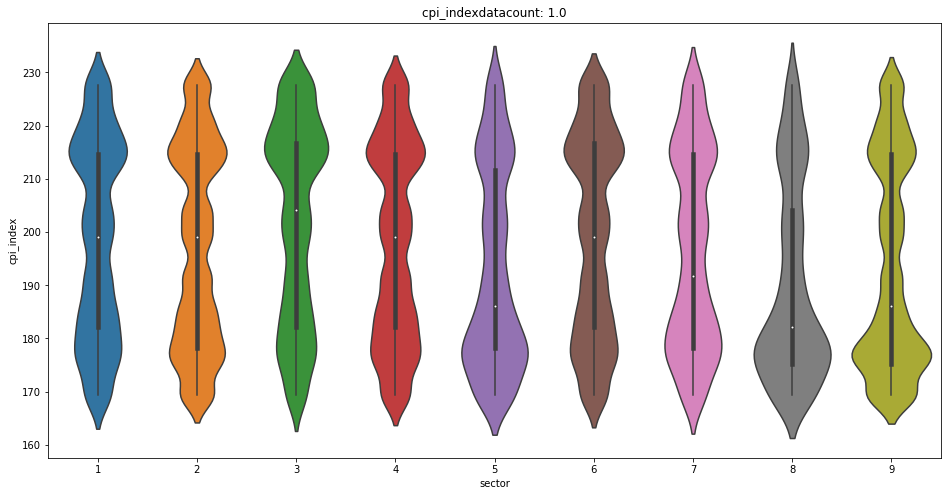

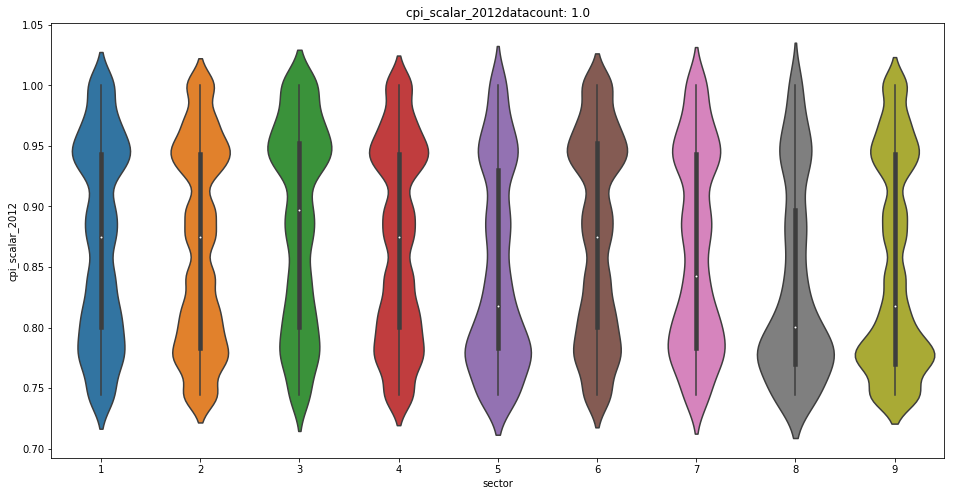

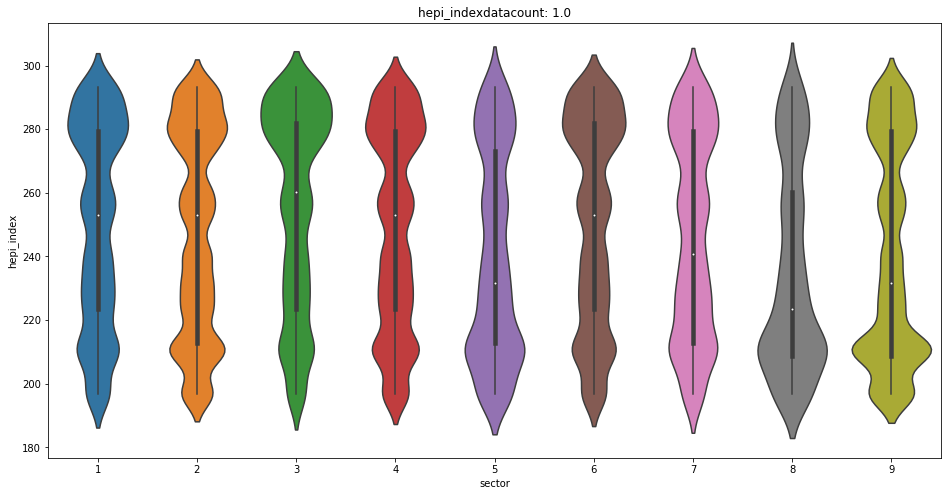

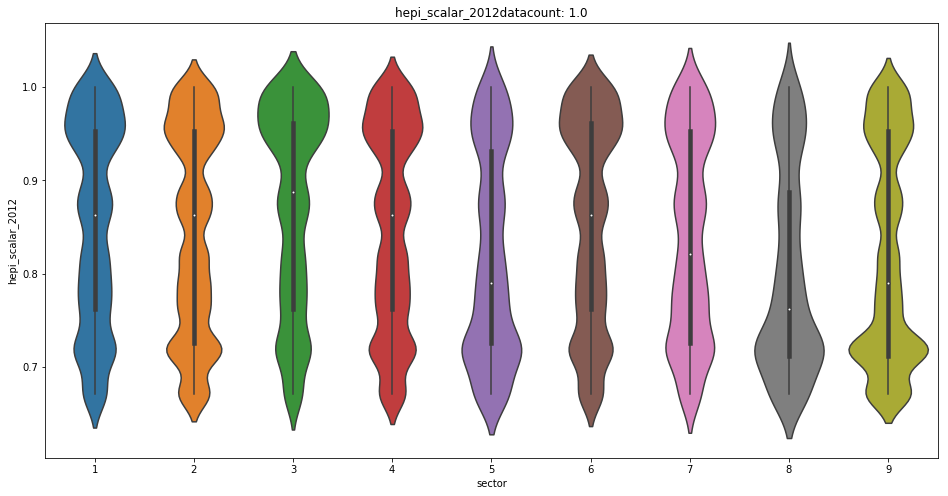

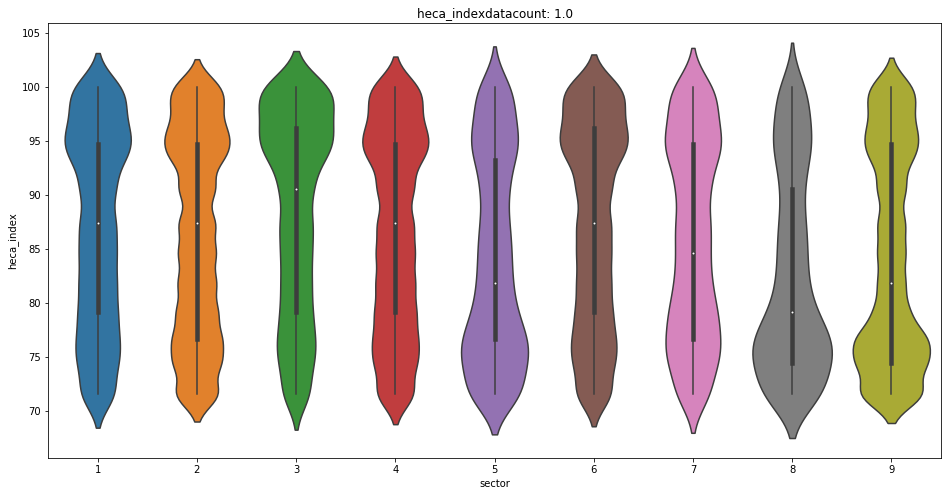

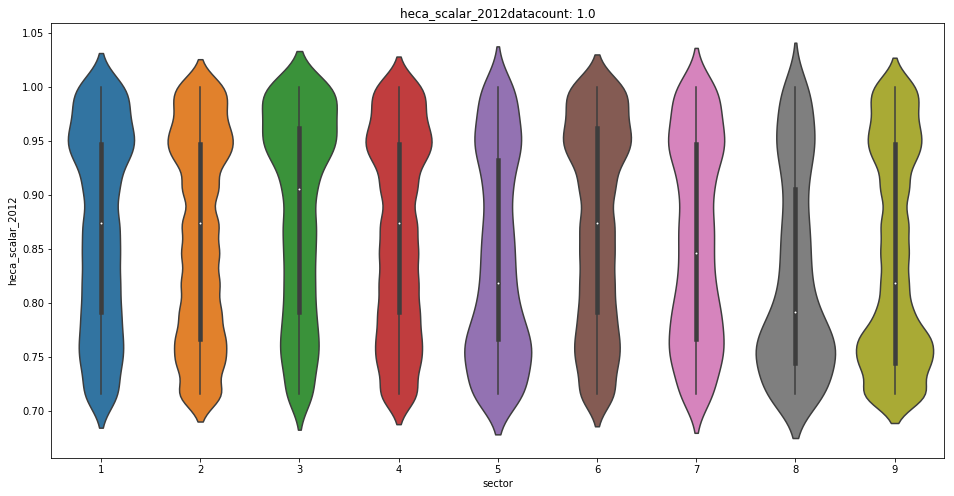

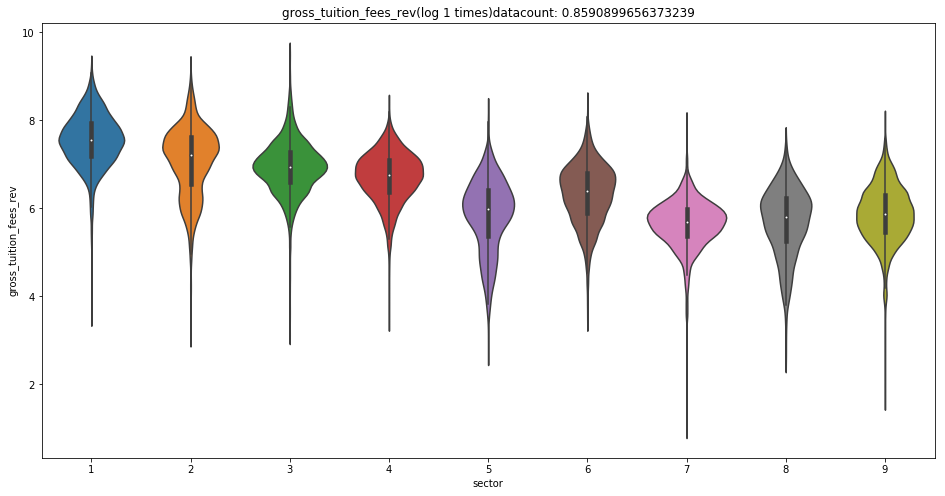

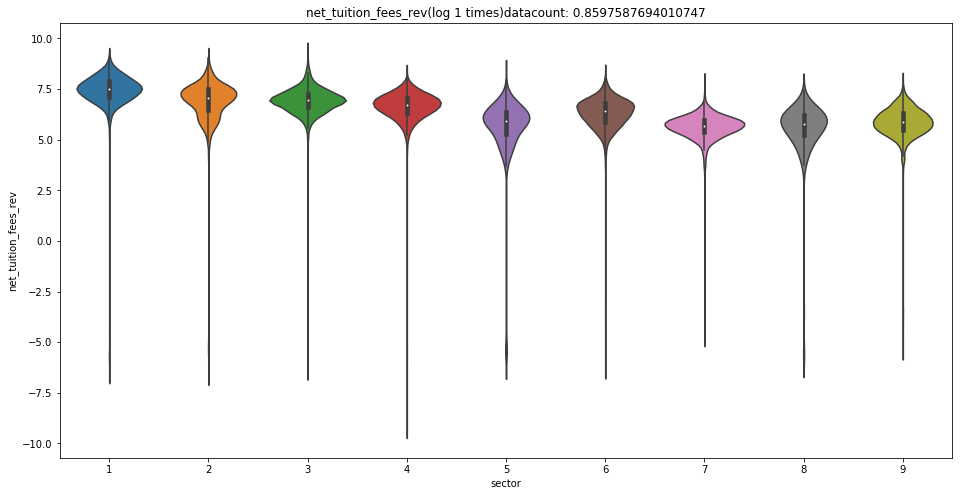

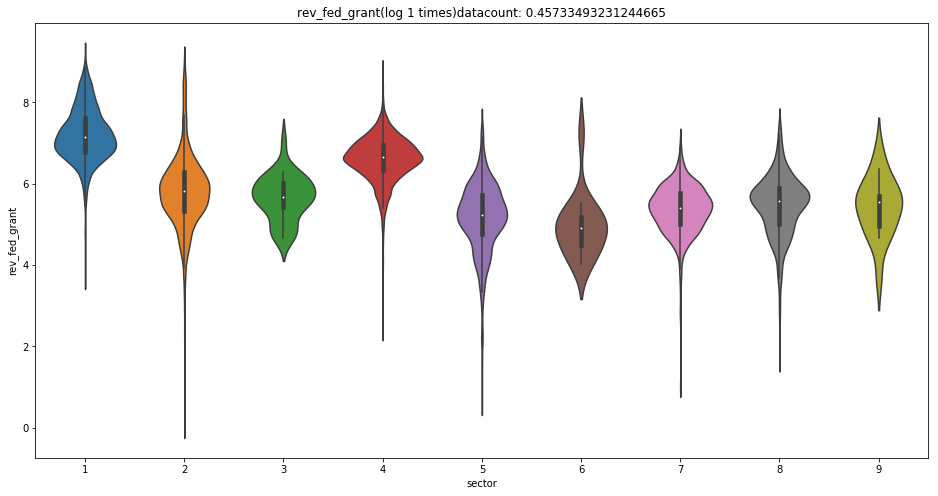

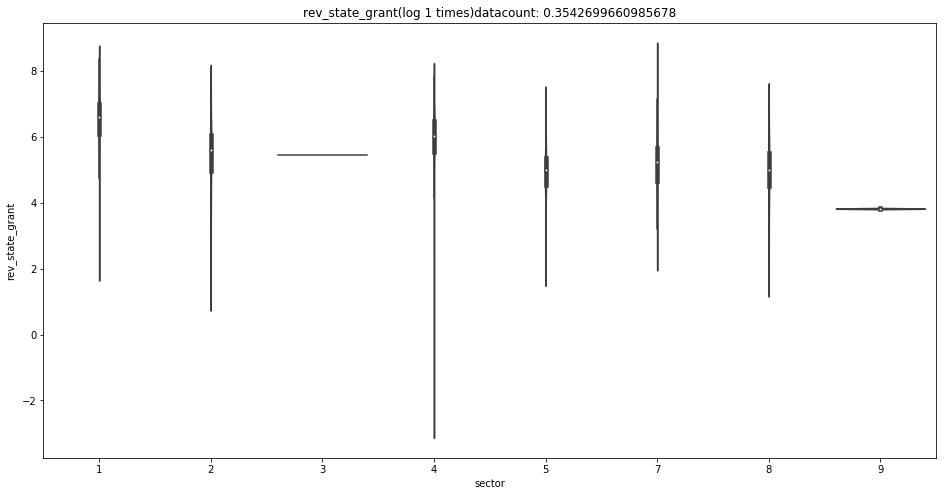

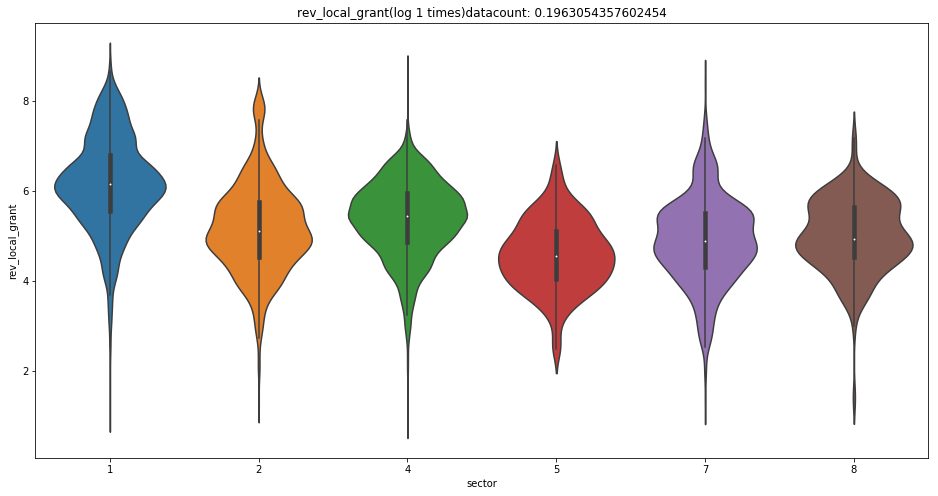

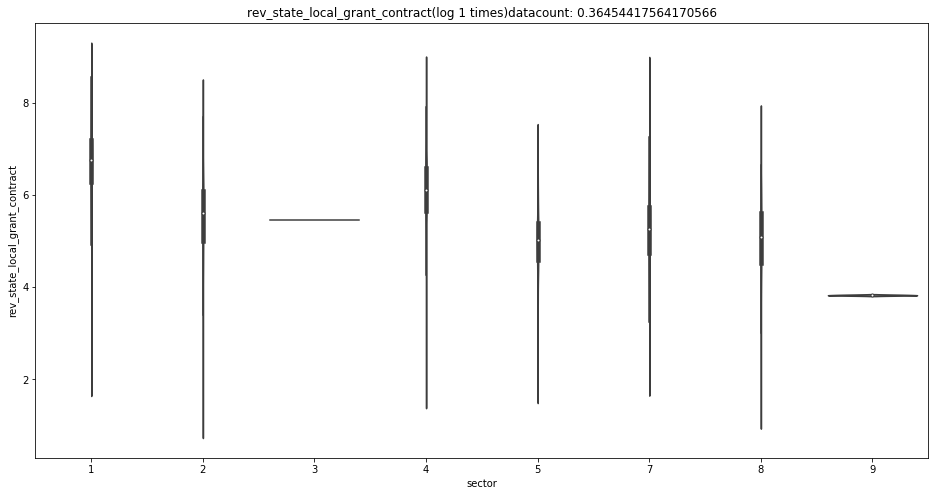

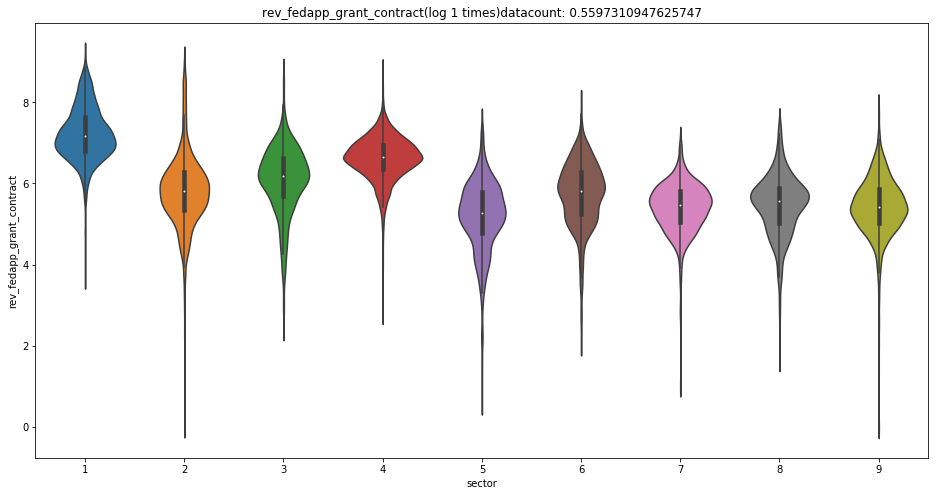

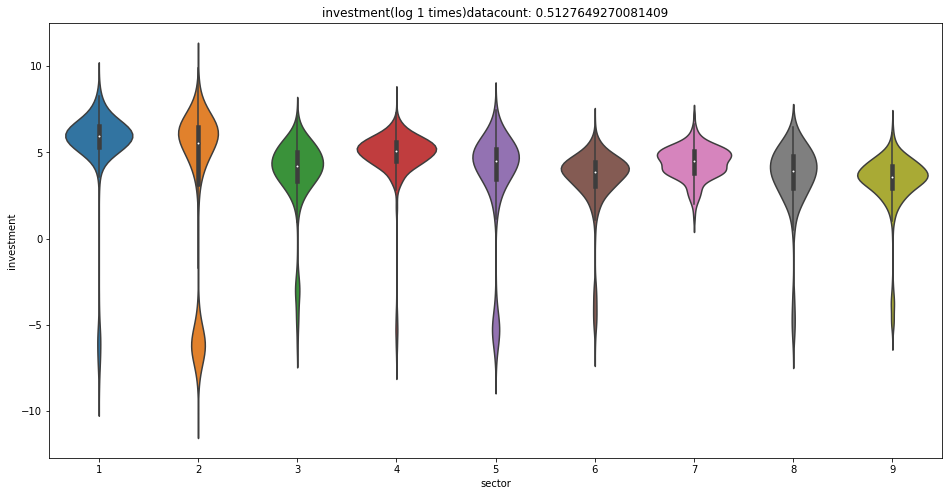

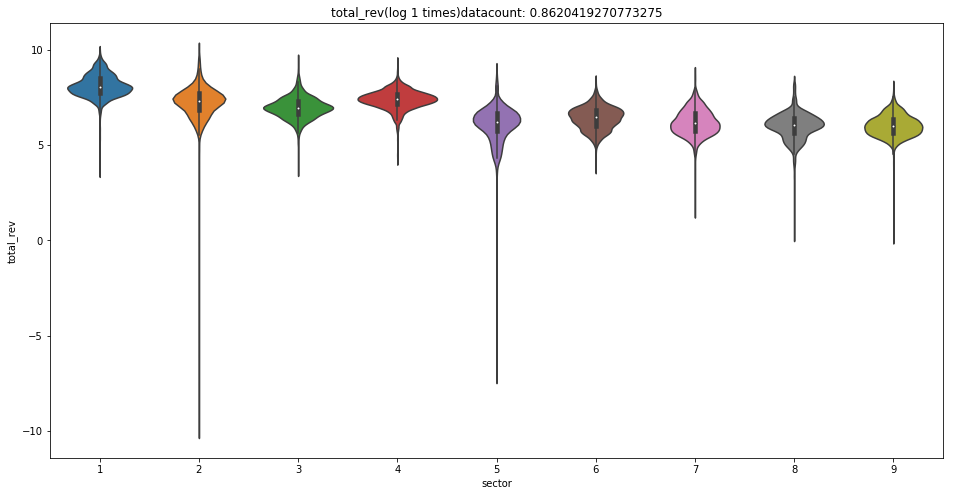

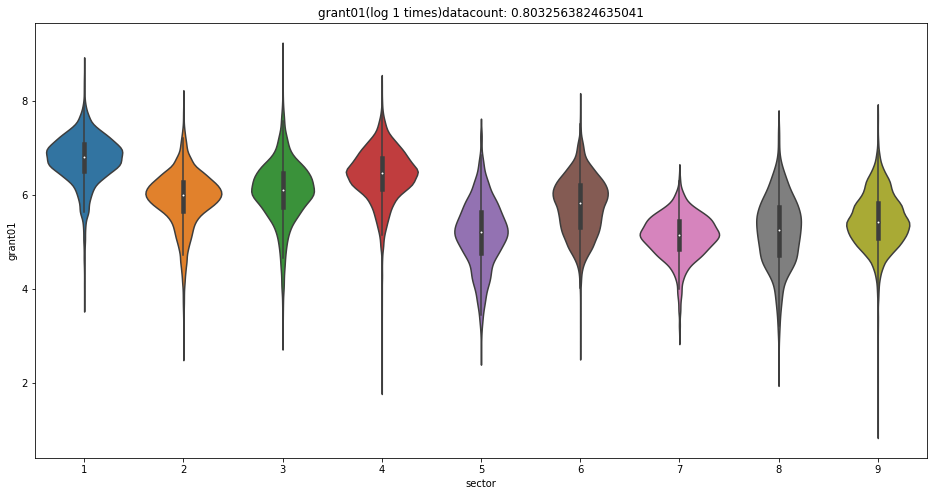

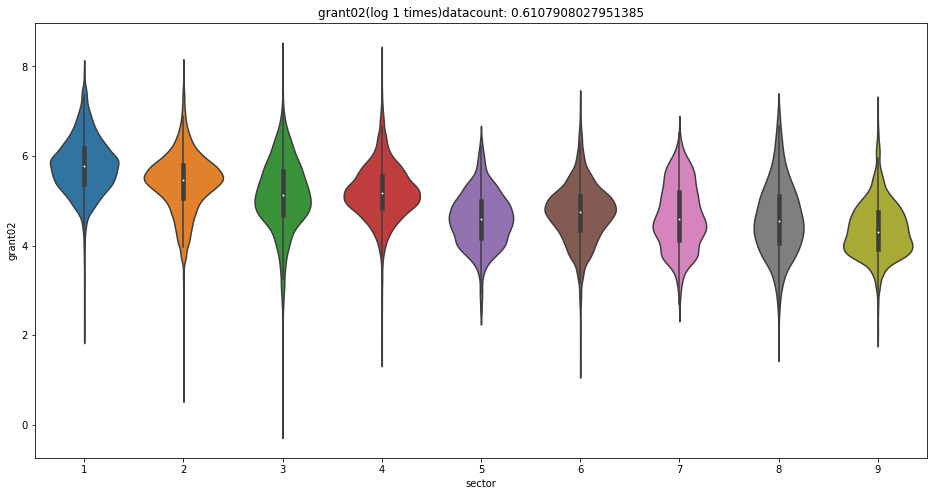

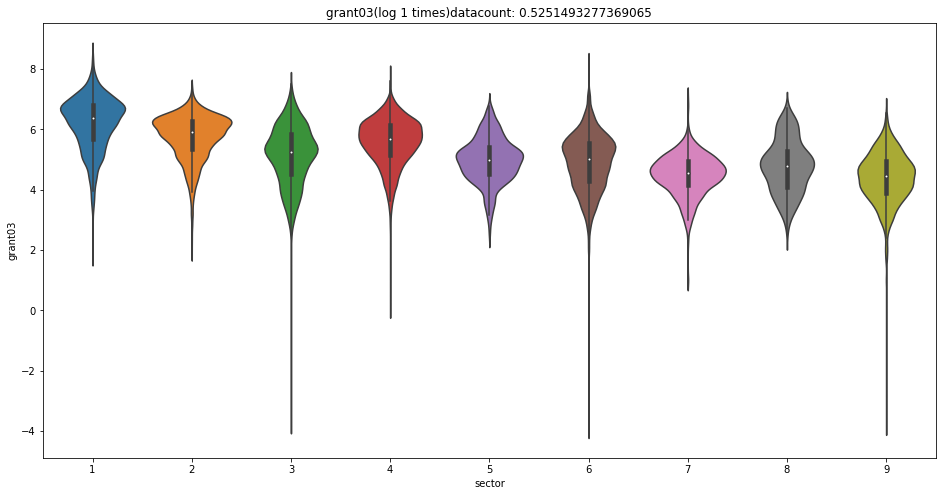

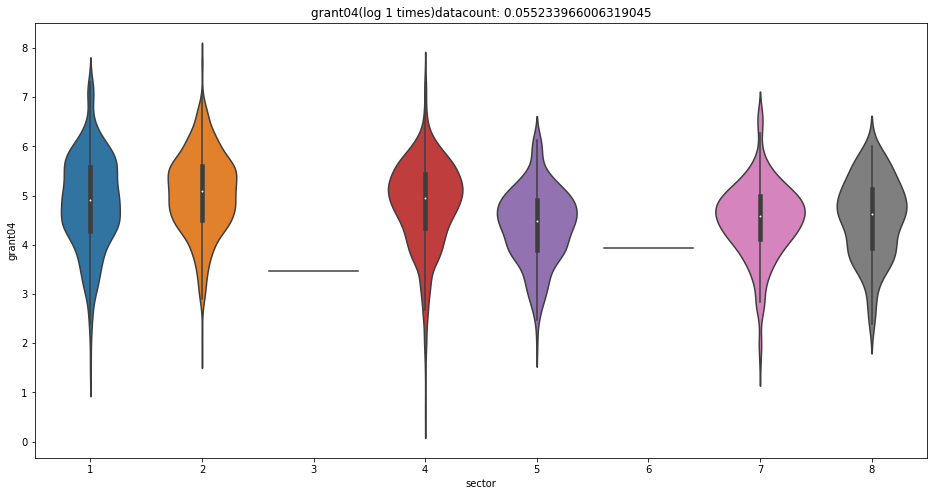

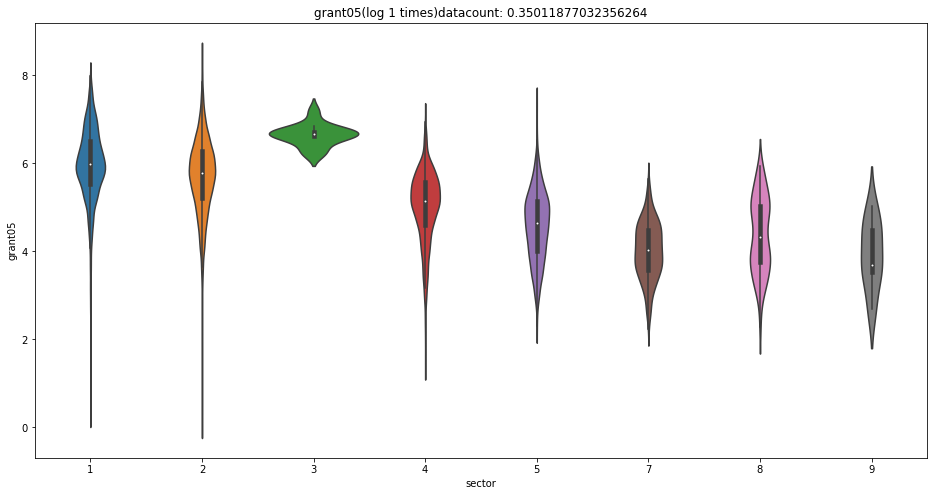

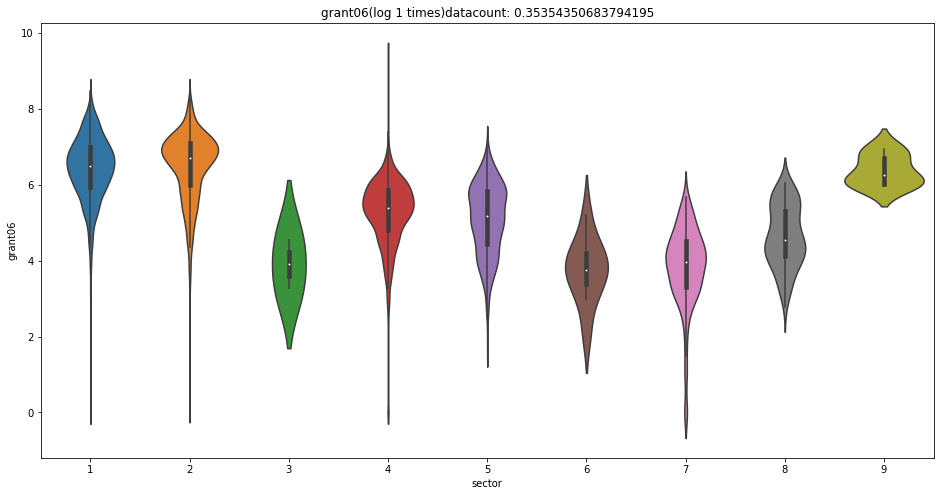

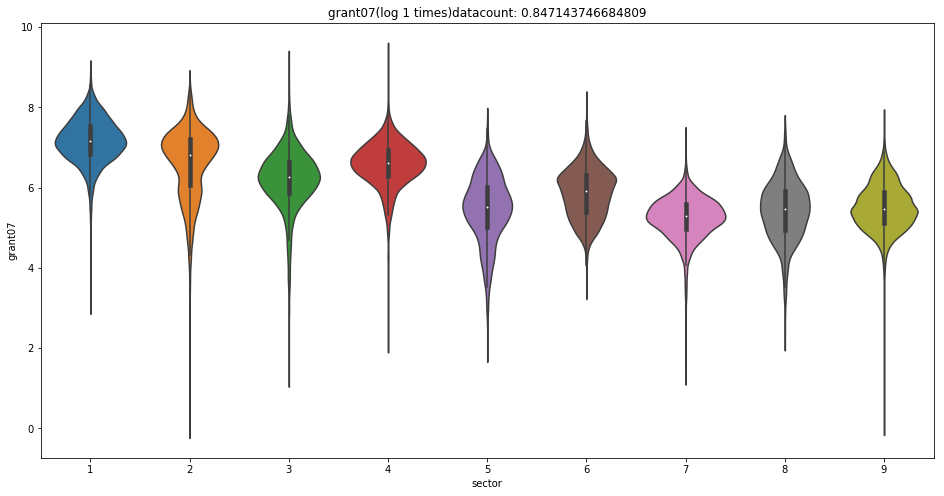

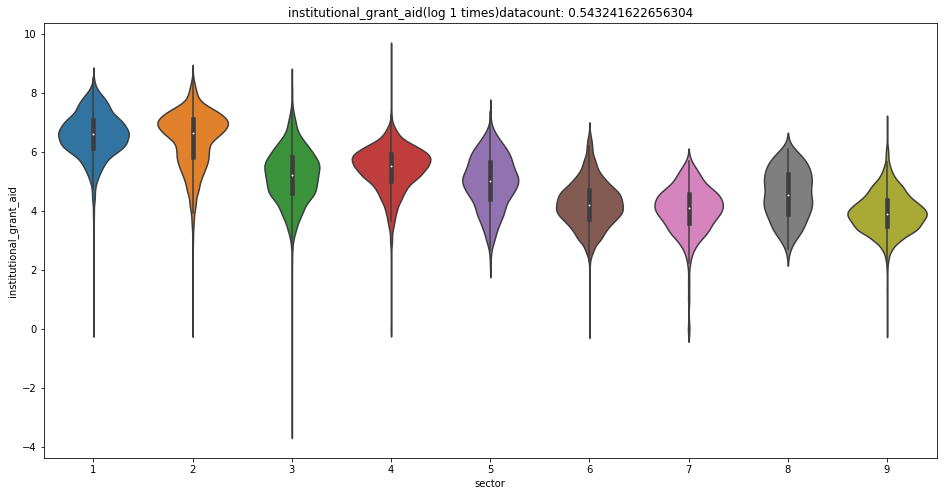

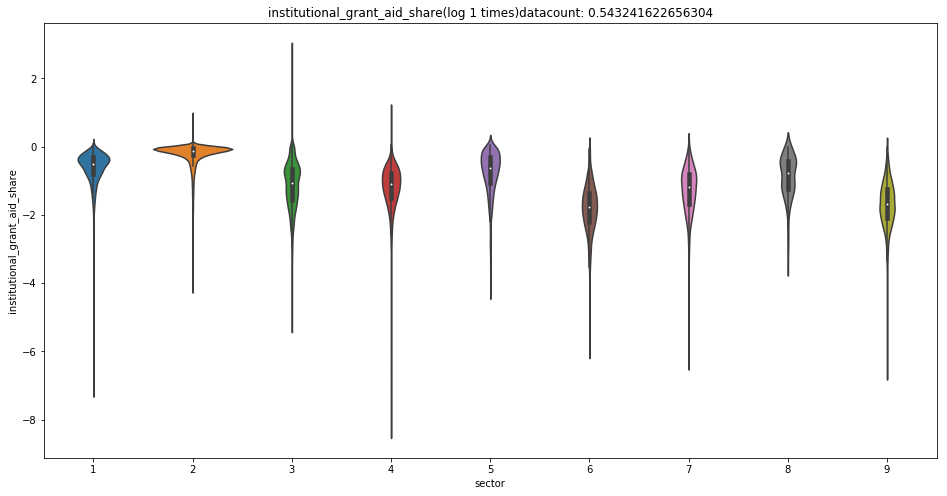

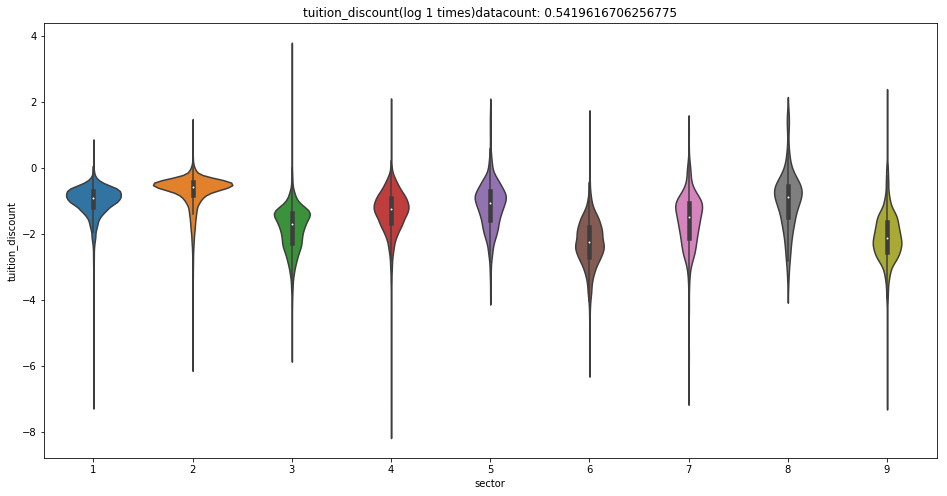

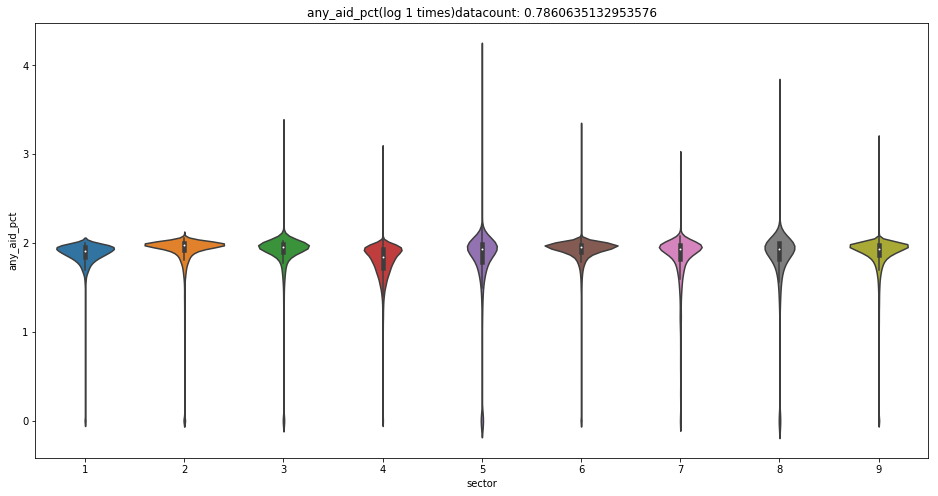

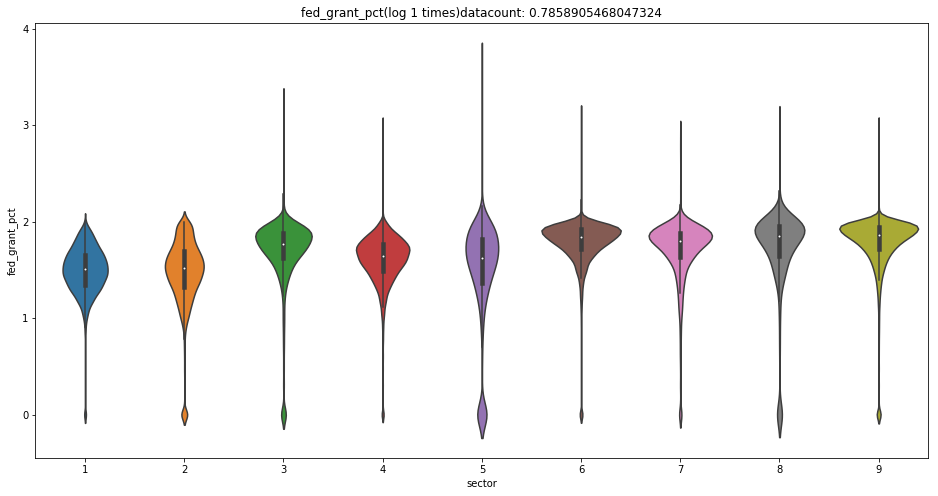

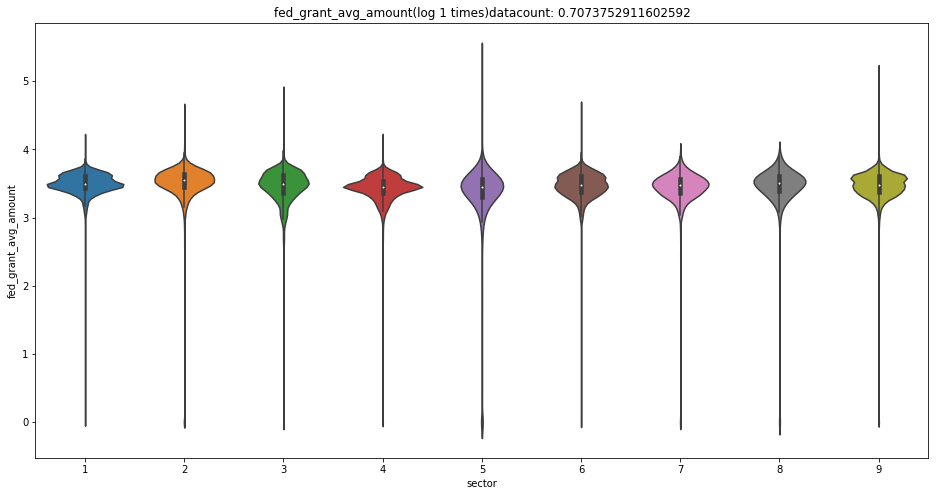

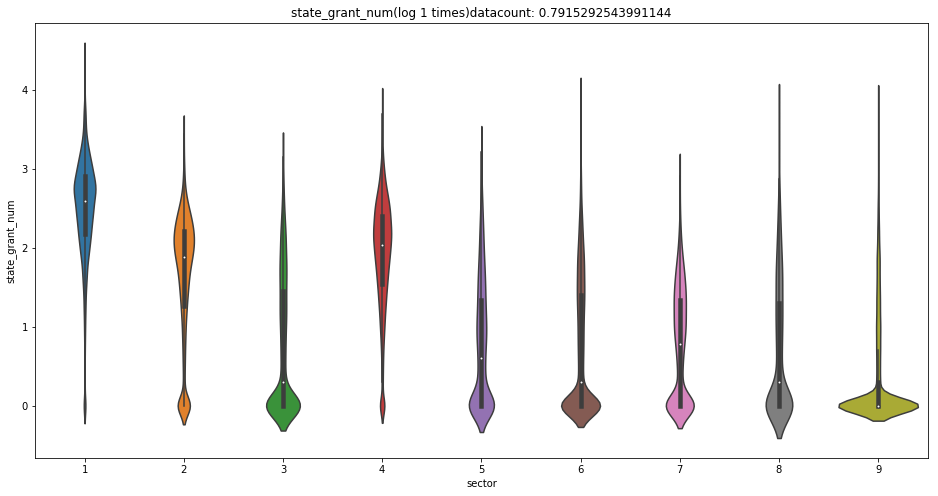

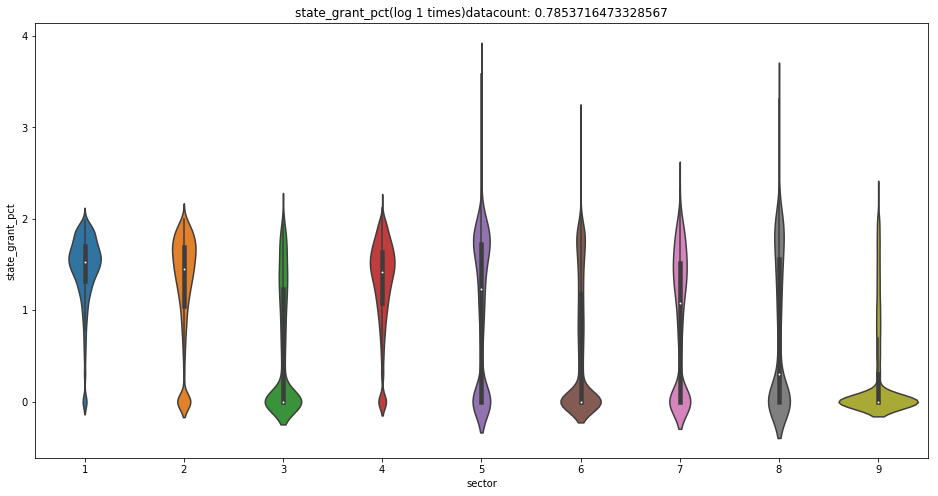

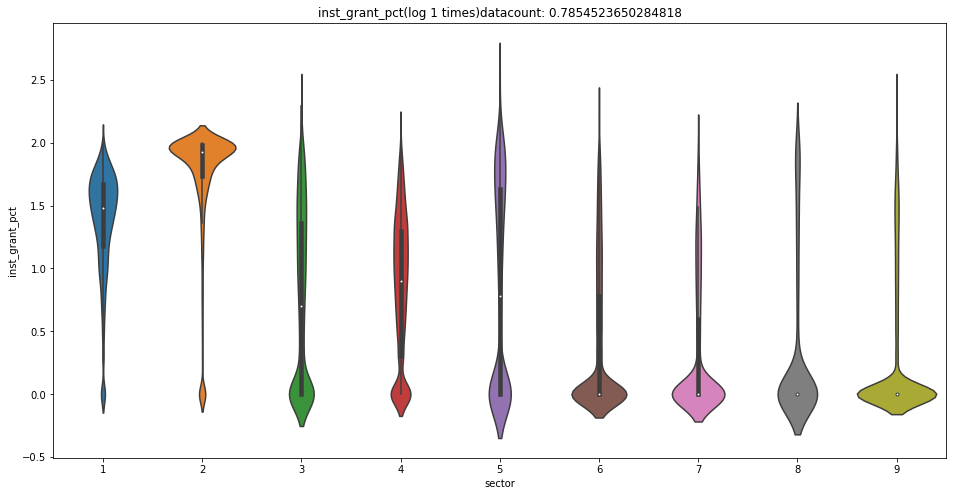

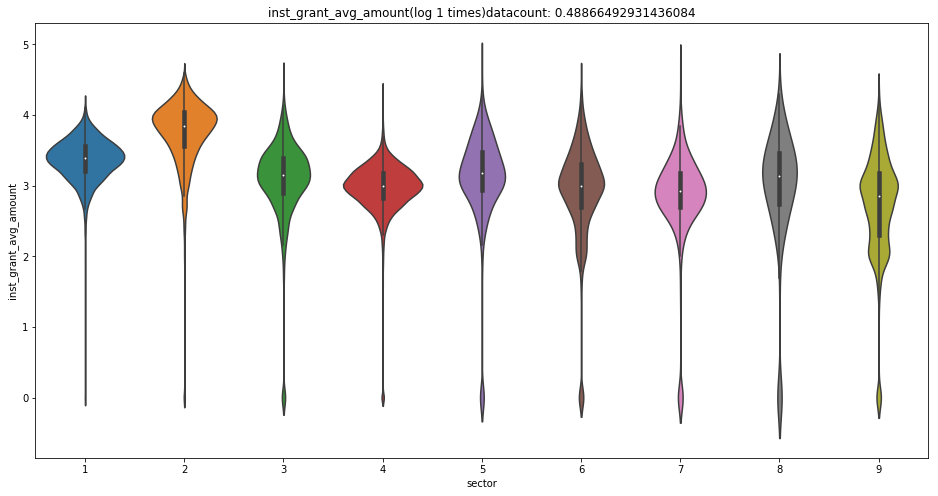

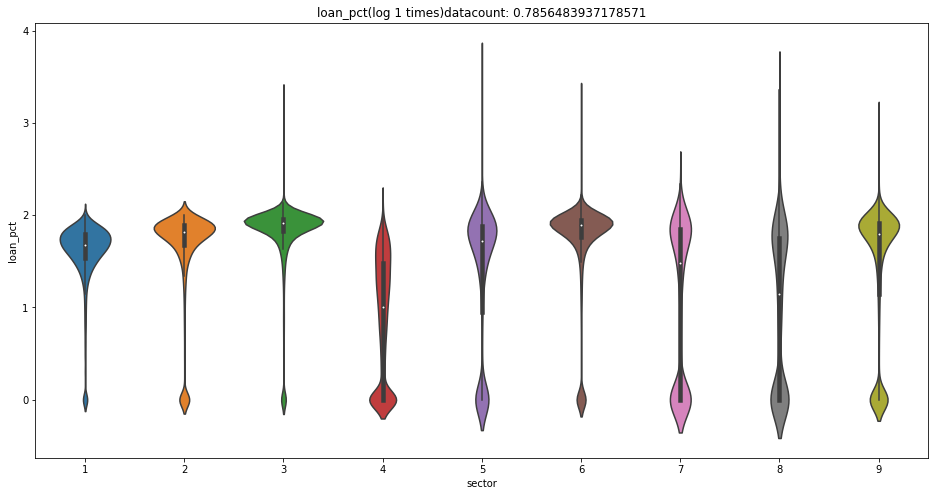

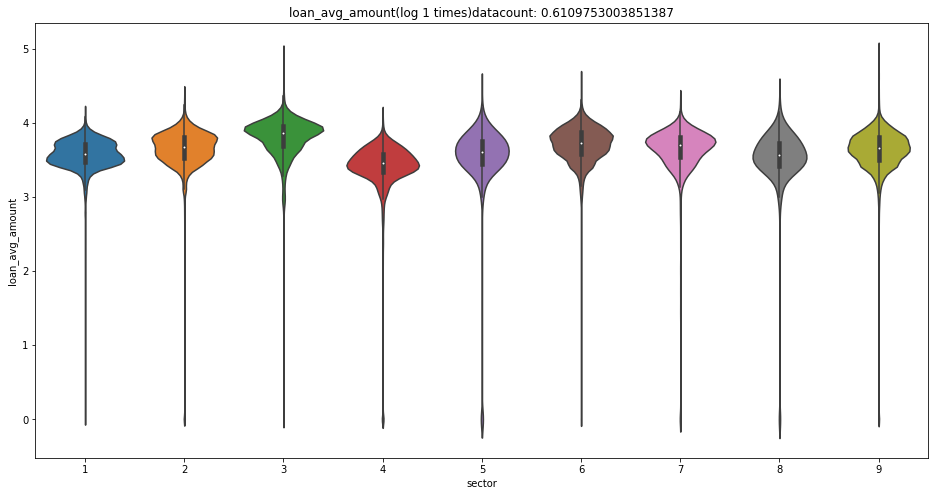

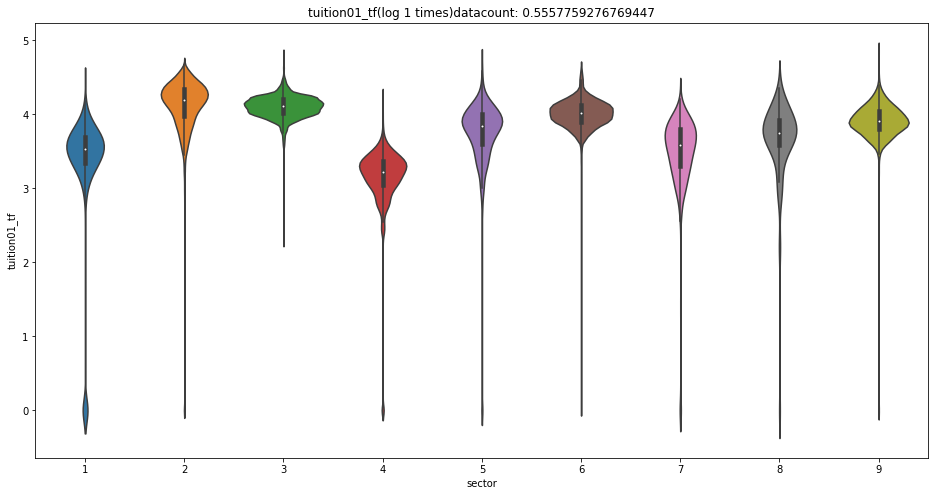

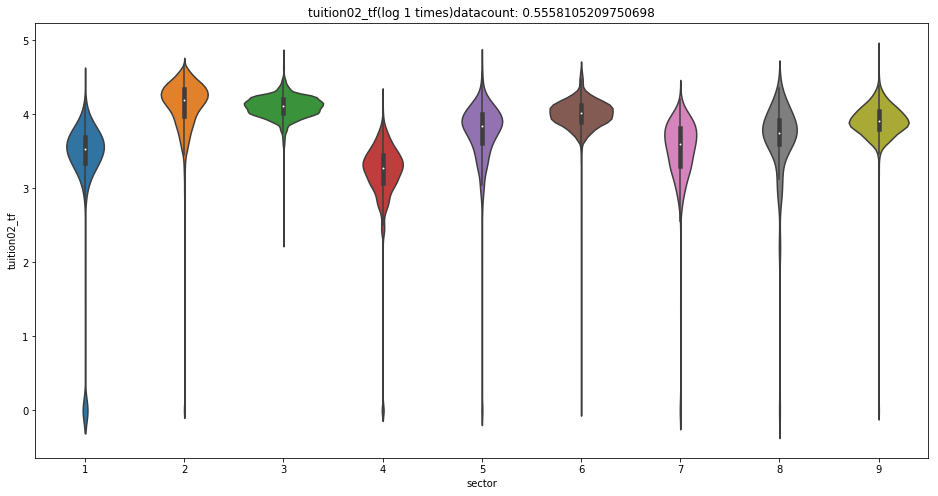

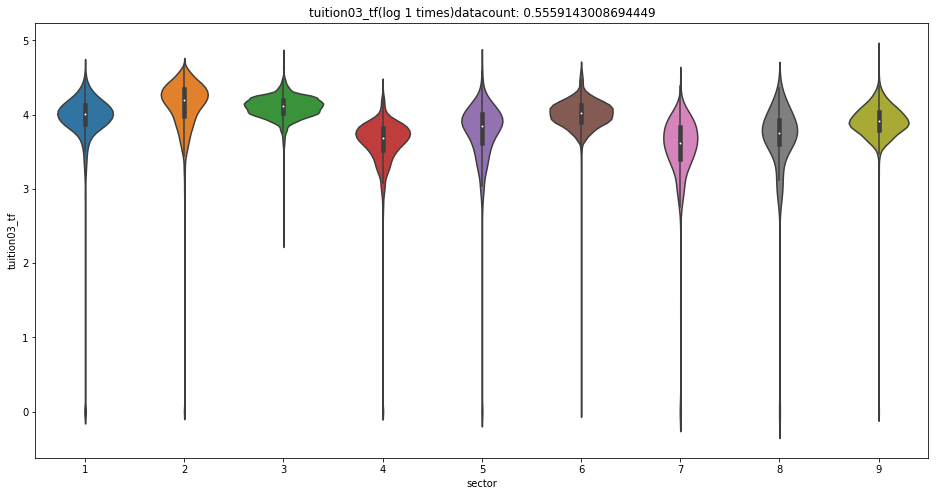

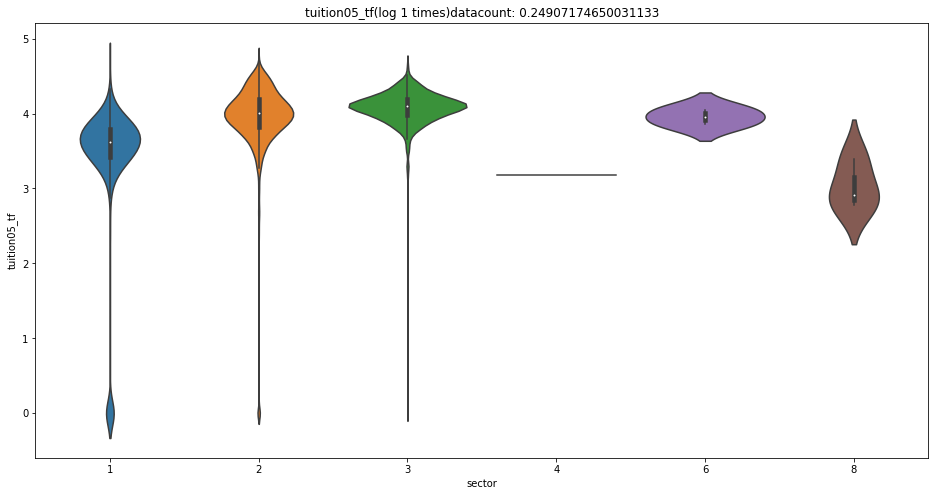

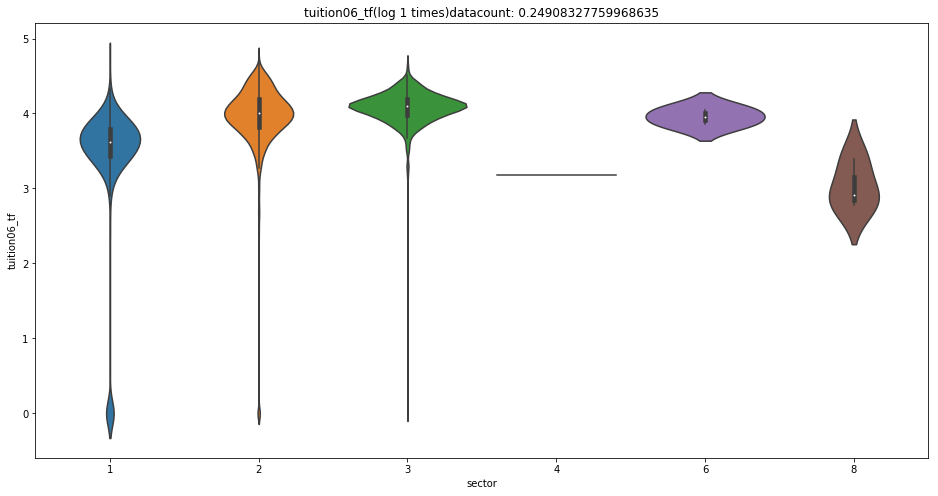

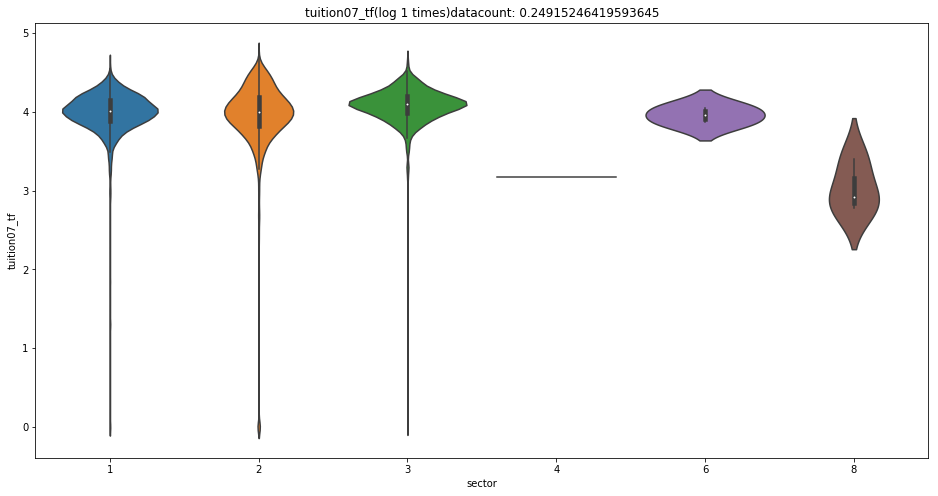

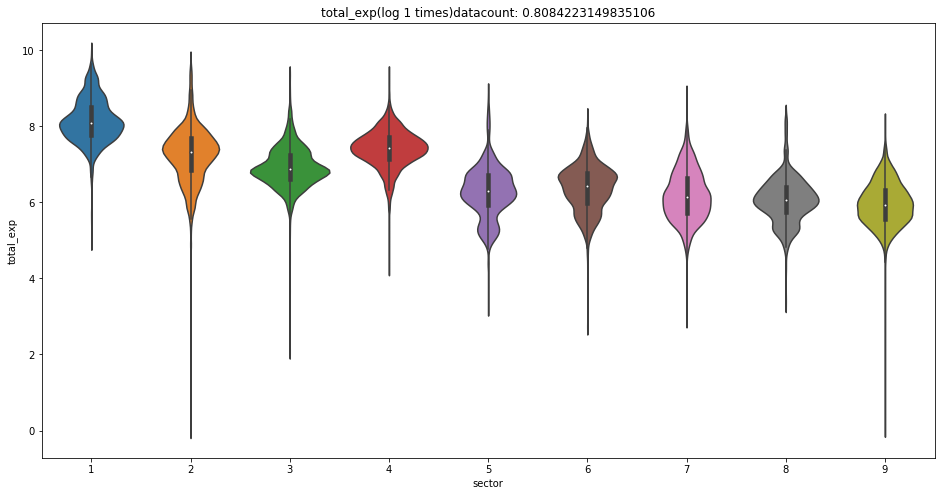

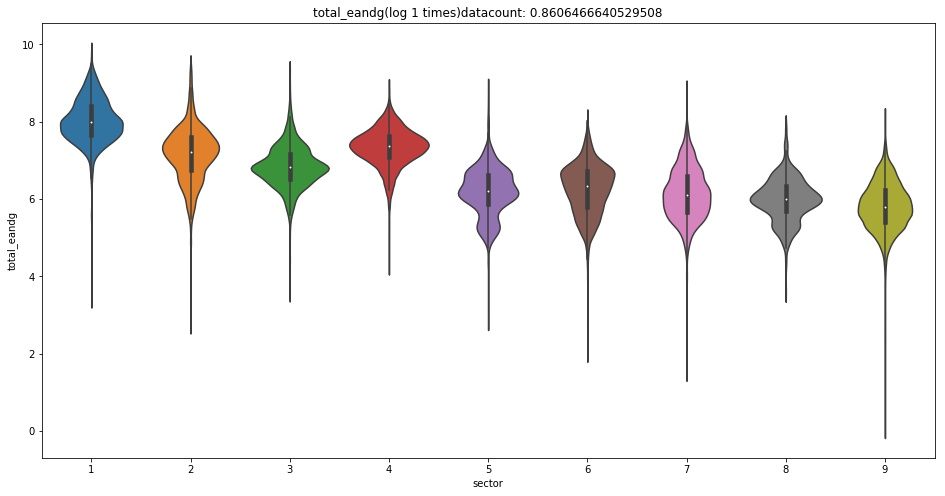

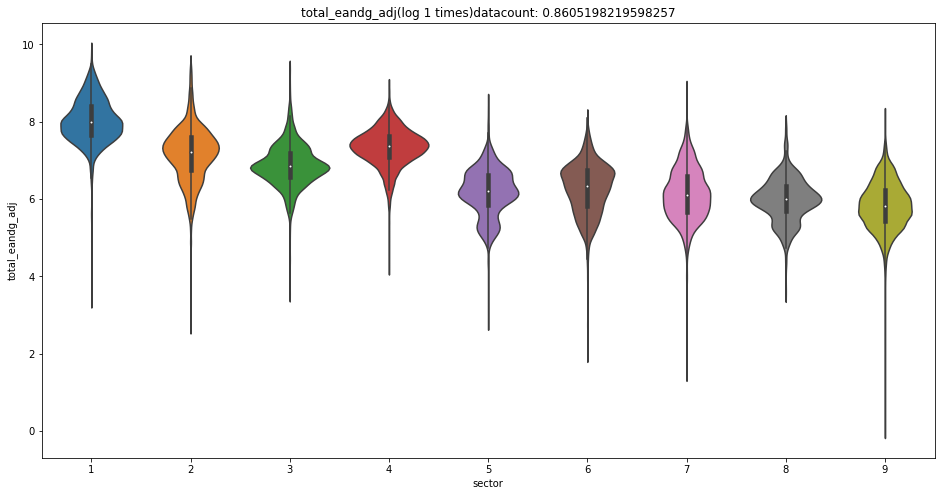

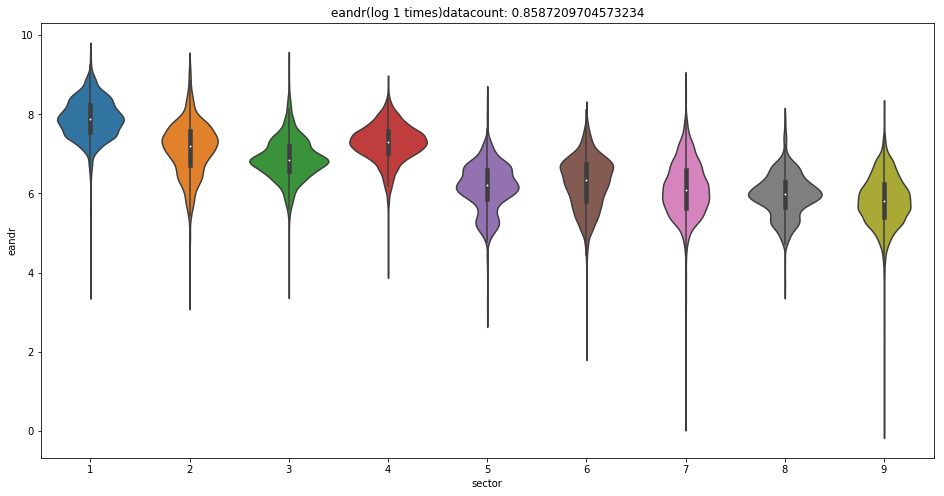

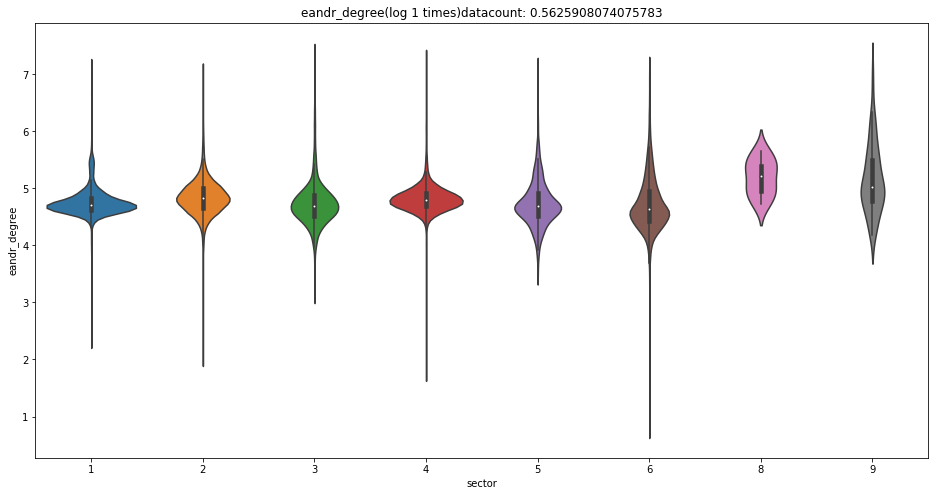

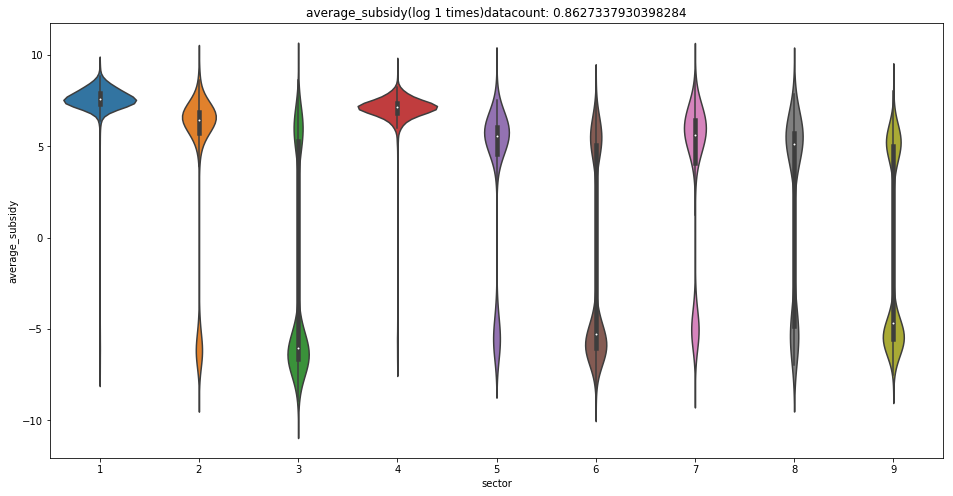

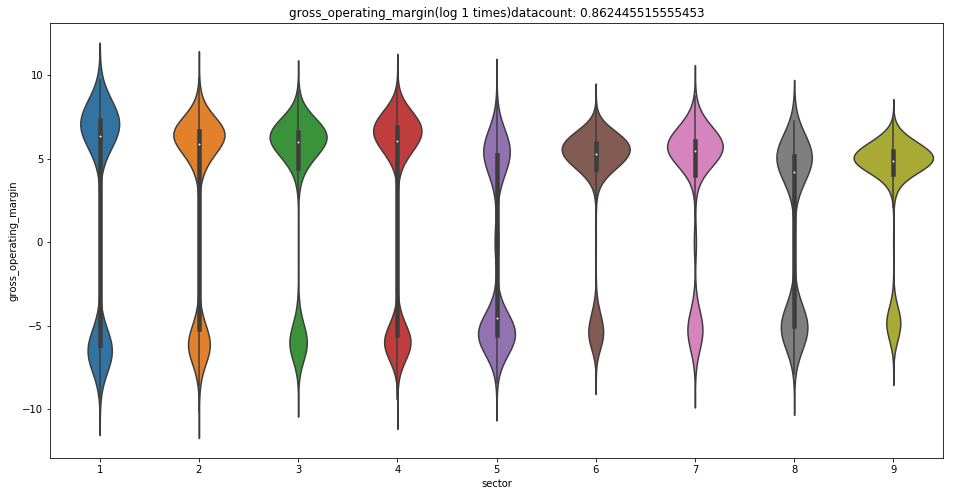

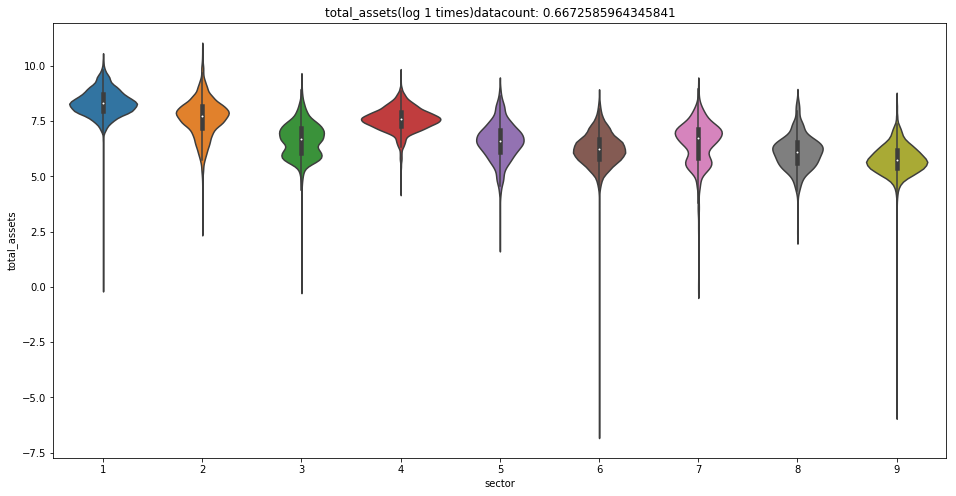

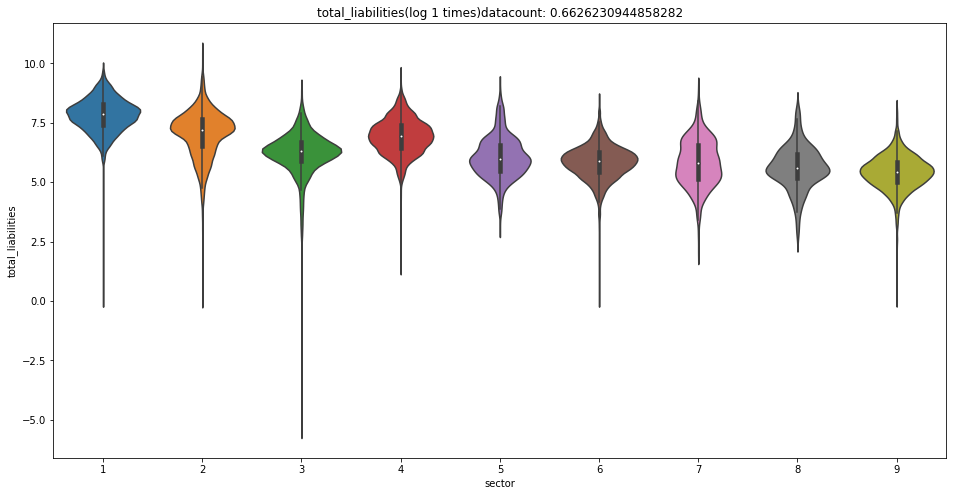

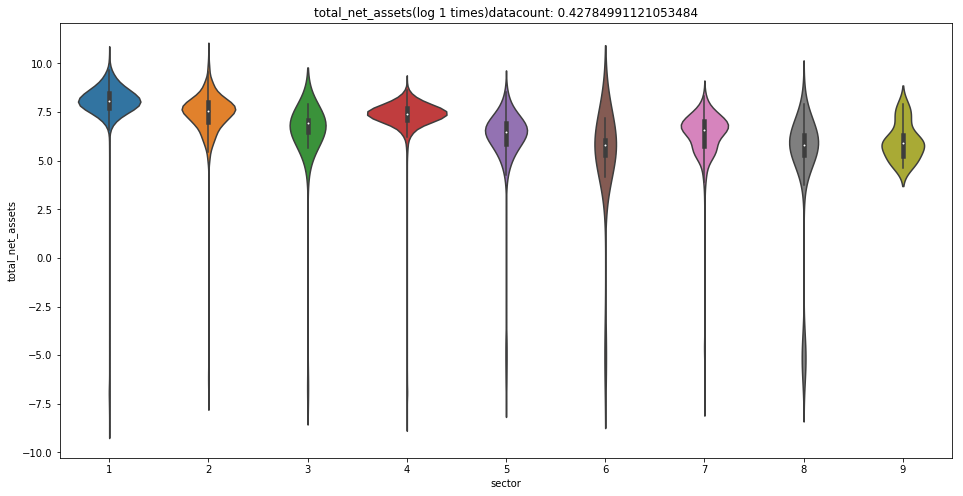

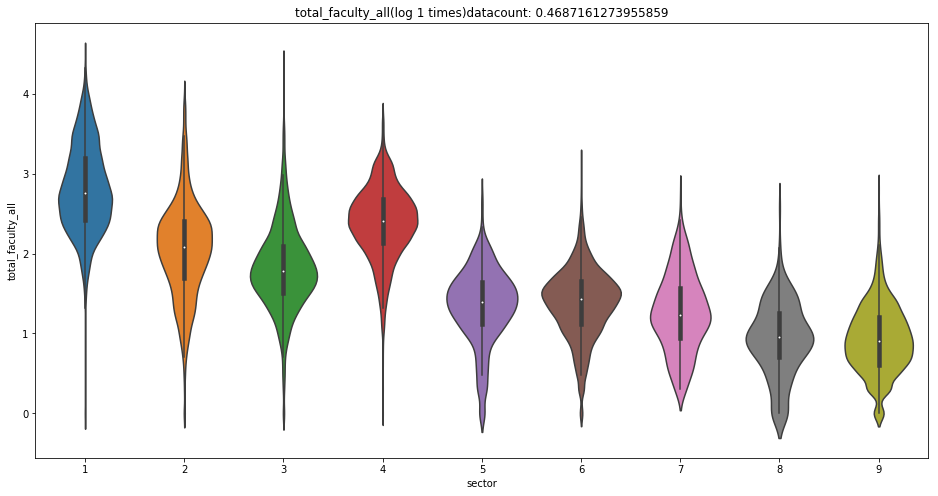

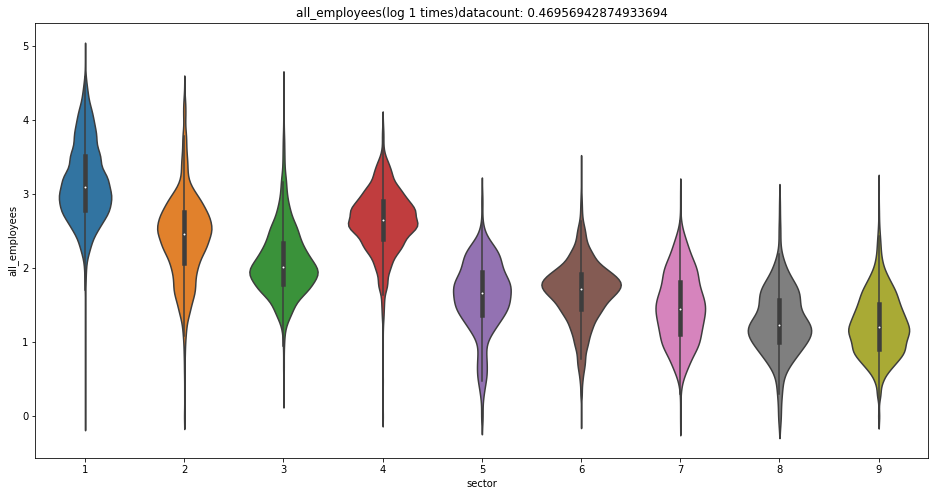

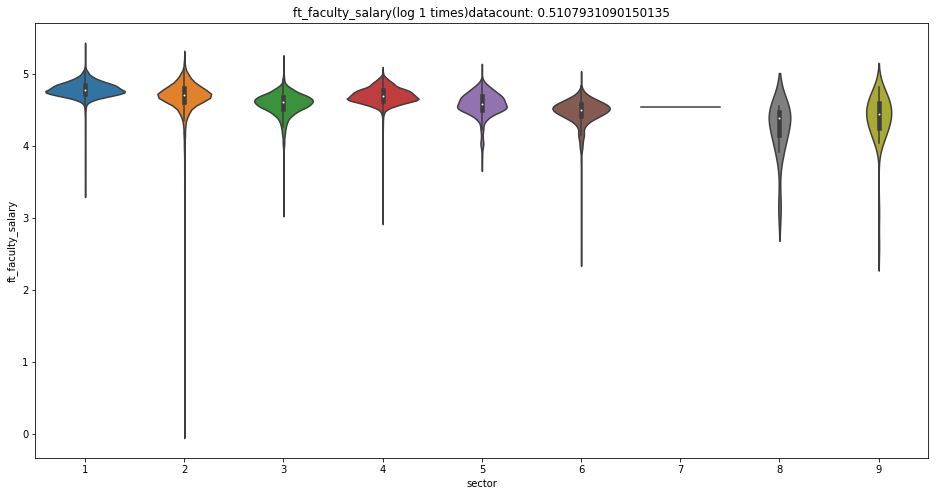

In [7]:
for c in college_financials.columns:
    df_temp = college_financials.copy()[college_financials[c].notnull()]
    need_log = False
    if df_temp[c].dtype in (object, np.int64):
        continue
    n = 0
    if (np.abs(df_temp[c].max() / df_temp[c].mean()) > 3):
        df_temp[c] = df_temp[c].apply(lambda x: np.sign(x) * np.log10(np.abs(x)) if not x == 0 else 0)
        n += 1
    plt.subplots(figsize=(16,8))
    sns.violinplot(x = "sector", y = c, data = df_temp, dropna=True)
    plt.title(c + ('(log {} times)'.format(n) if n > 0 else '') + 'datacount: ' + str(len(df_temp)/len(college_financials)))
    plt.savefig('exploration/college_financials/' + c + '.pdf')

After initial examination of the data, it looks like overall quality of the data is inferior in sectors 0 and 99 where there are duplicates (in the case of 2010 data for Aveda Institute Chapel Hill) and the overall count is a very small percentage of all the data. so we are going to remove all sectors in 0 and 99

Text(0.5,1,'count by sector')

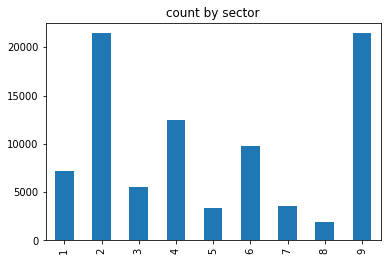

In [8]:
pd.value_counts(college_financials['sector']).sort_index().plot.bar()
plt.title('count by sector')

Text(0.5,1,'count by academic_year')

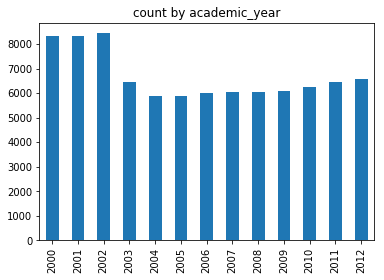

In [9]:
pd.value_counts(college_financials['academic_year']).sort_index().plot.bar()
plt.title('count by academic_year')

In [10]:
year_dict = {1:4, 2:4, 3:4, 4:2, 5:2, 6:2, 7:1, 8:1, 9:1, 0:0, 99:0}
college_financials['years'] = college_financials['sector'].apply(lambda x: year_dict[x])

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


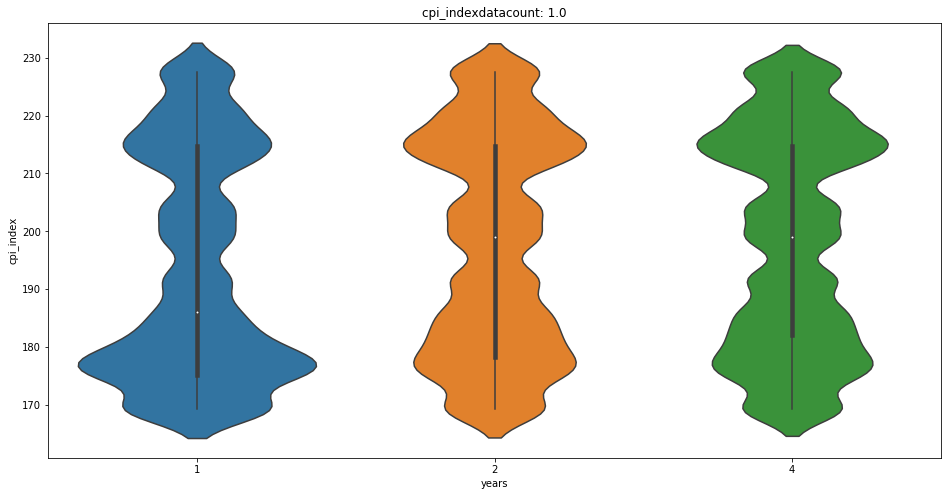

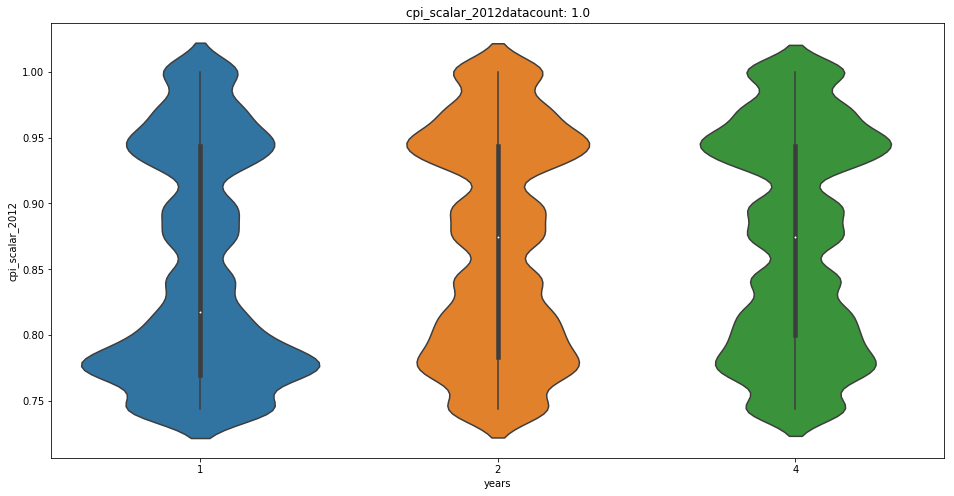

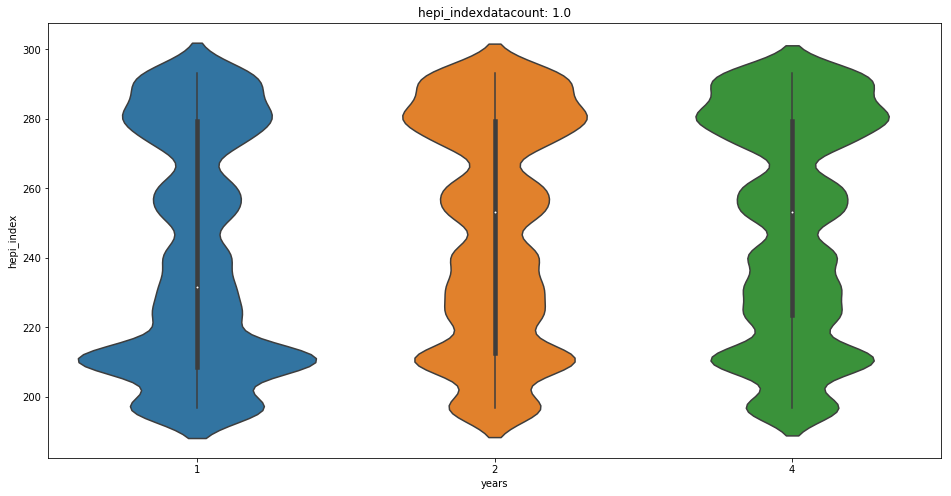

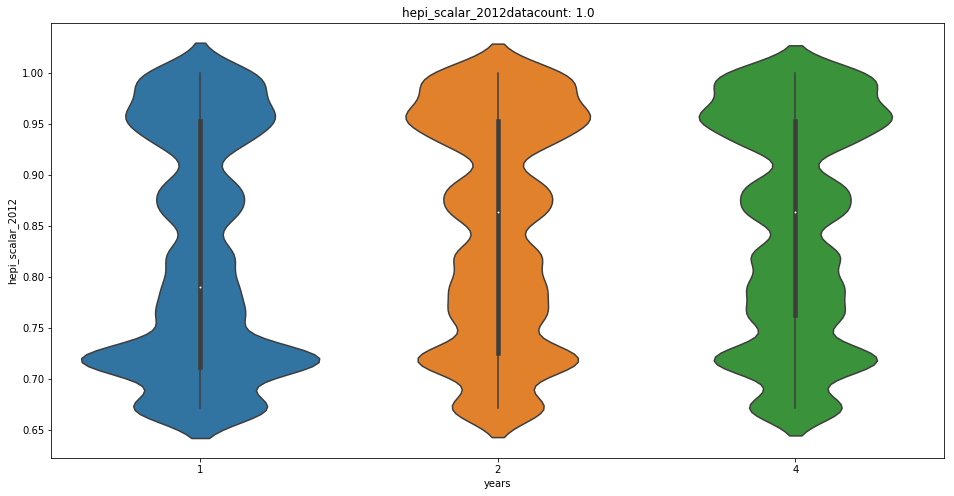

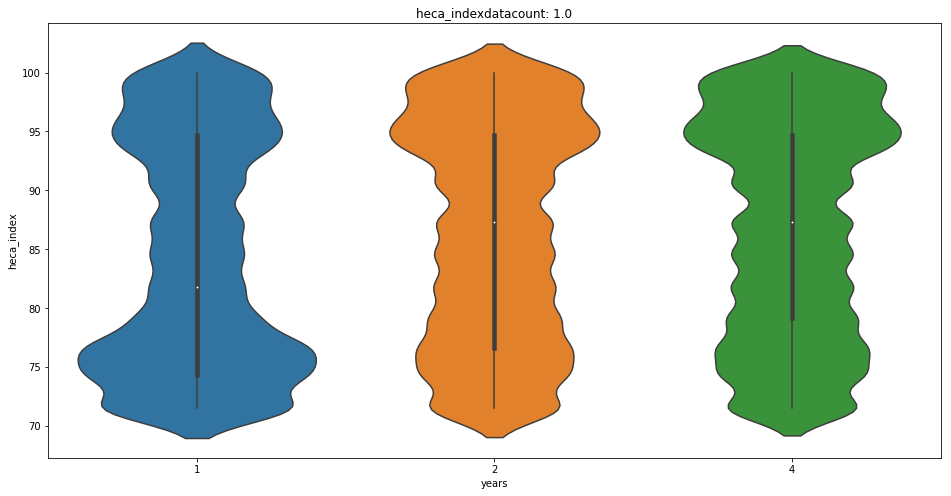

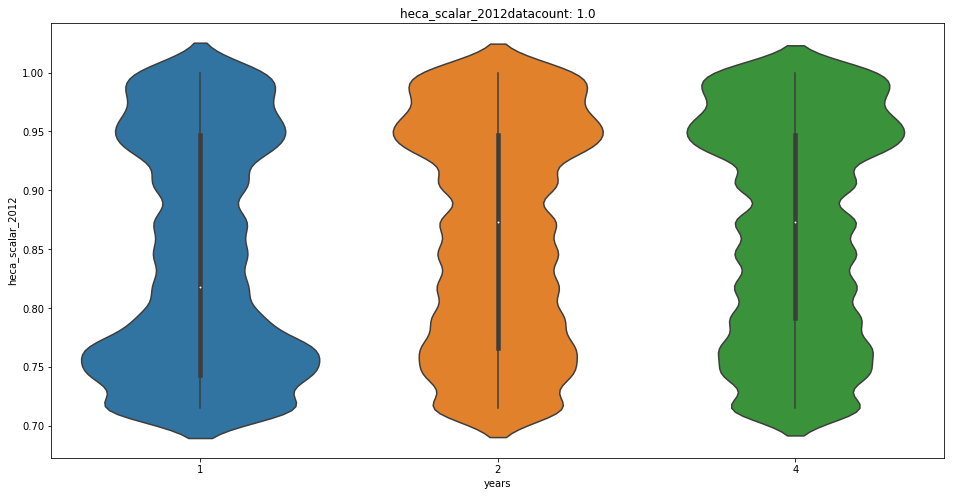

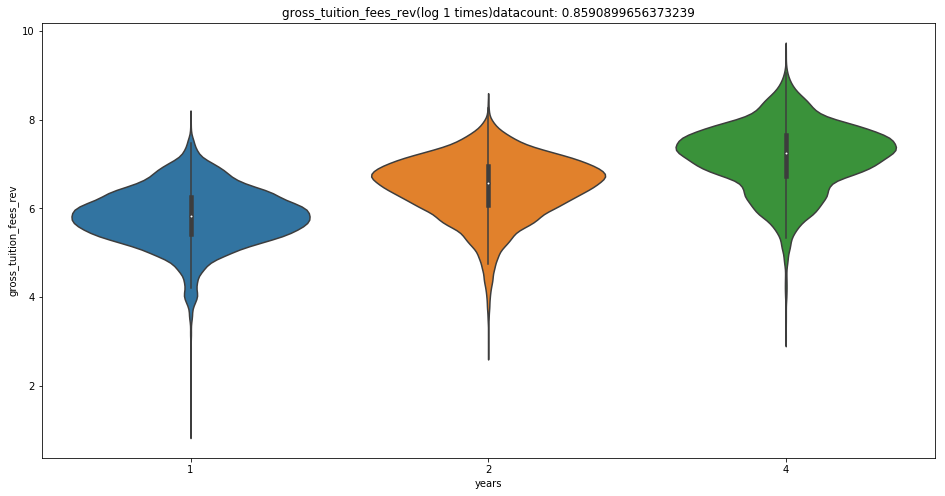

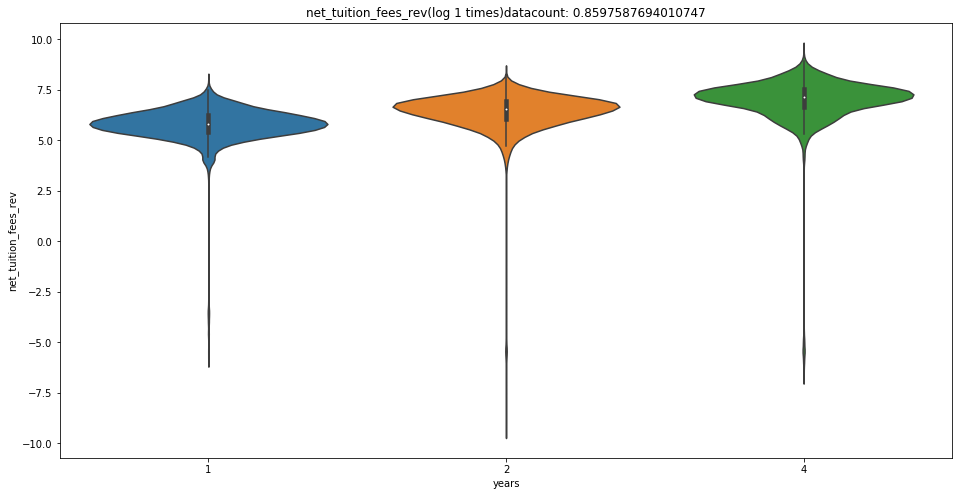

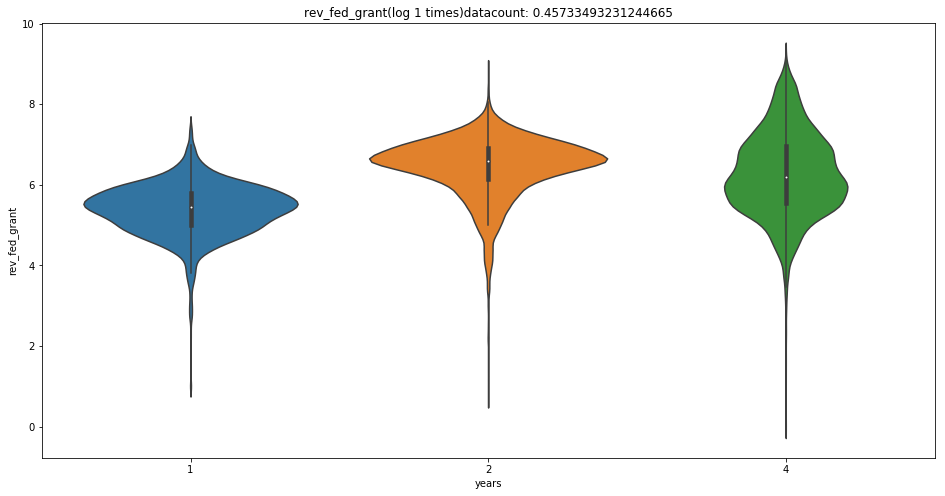

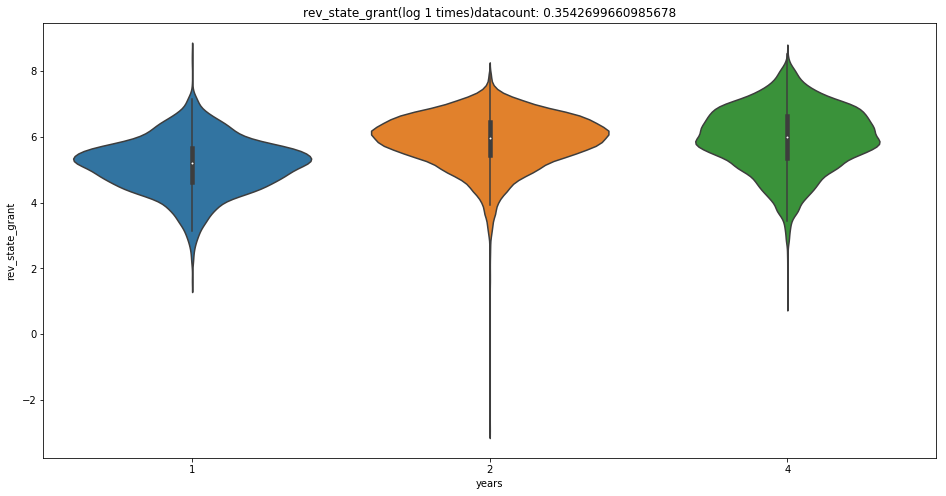

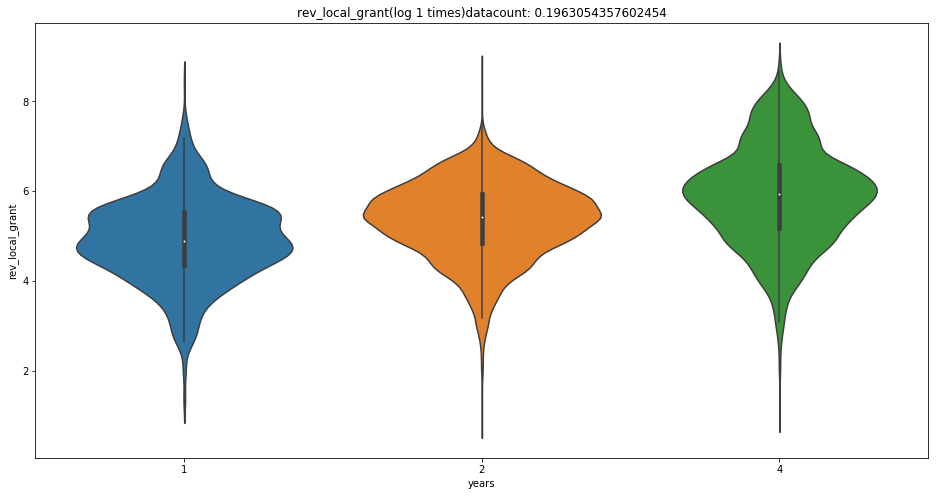

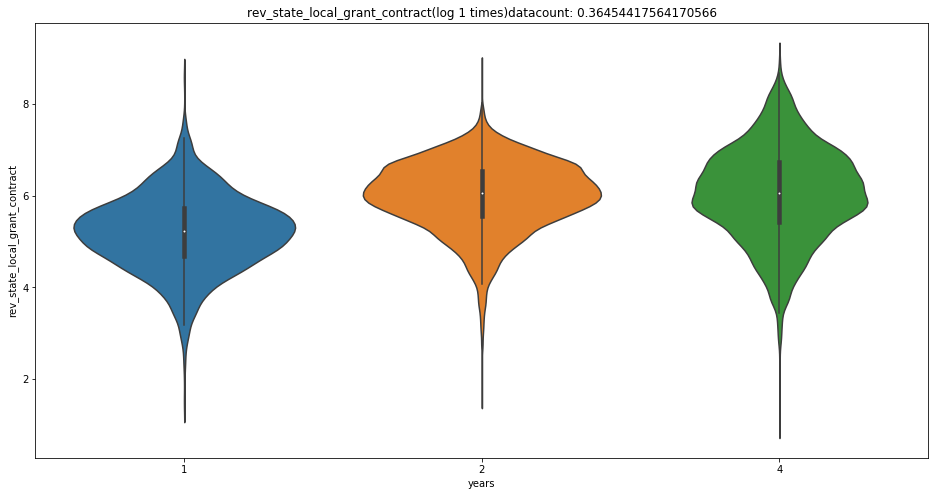

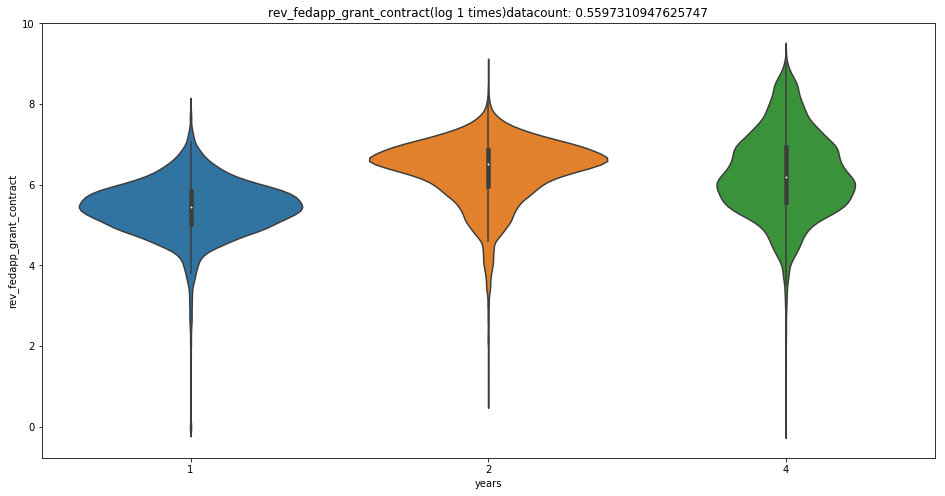

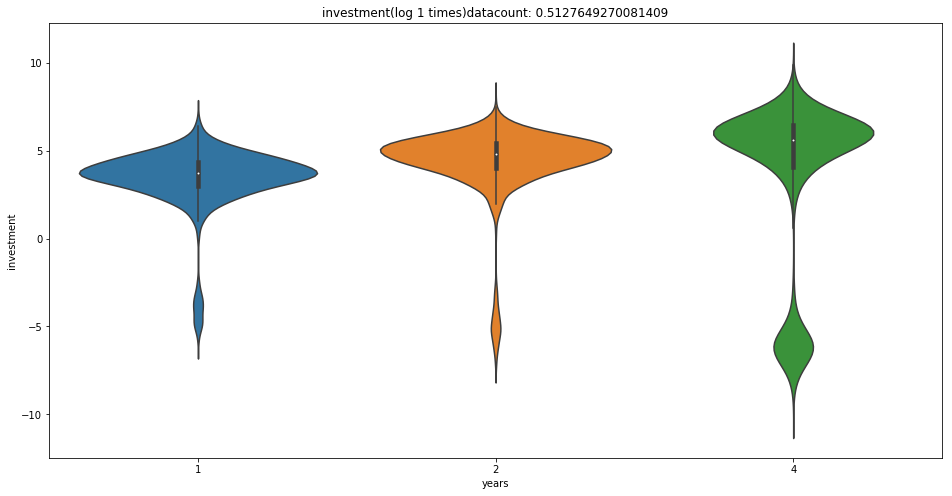

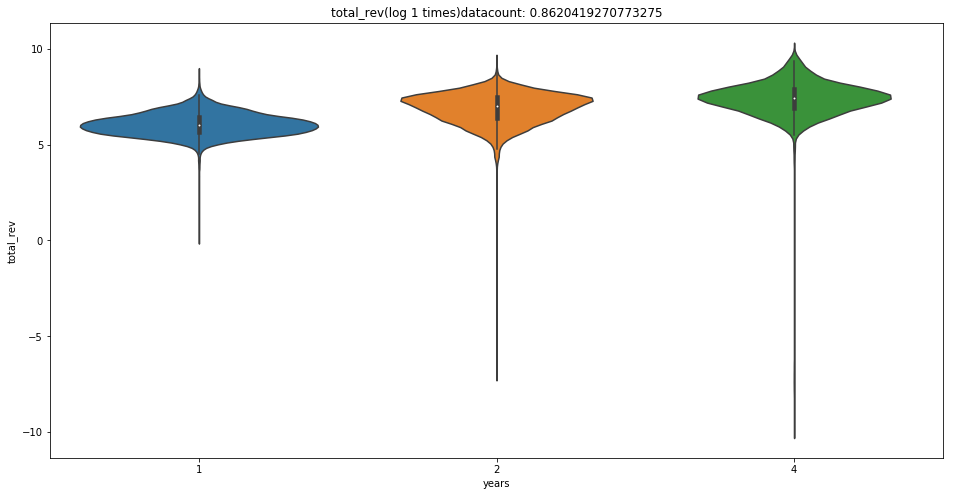

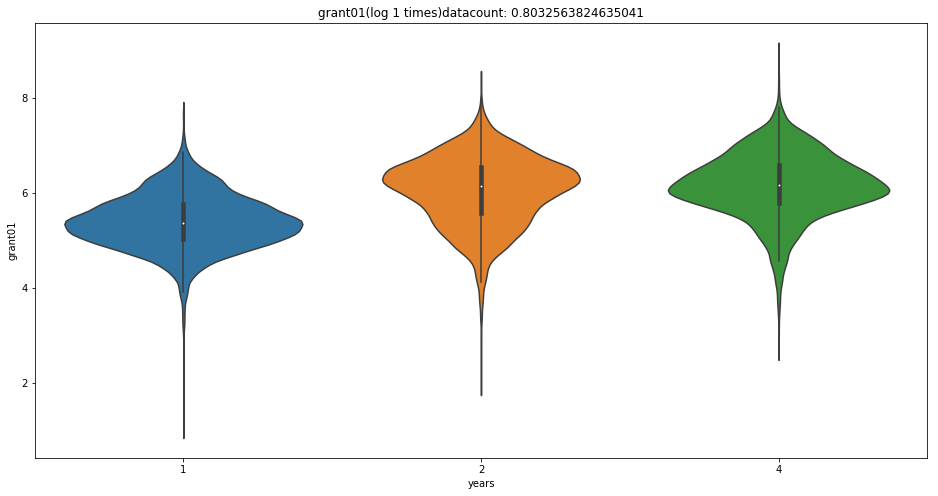

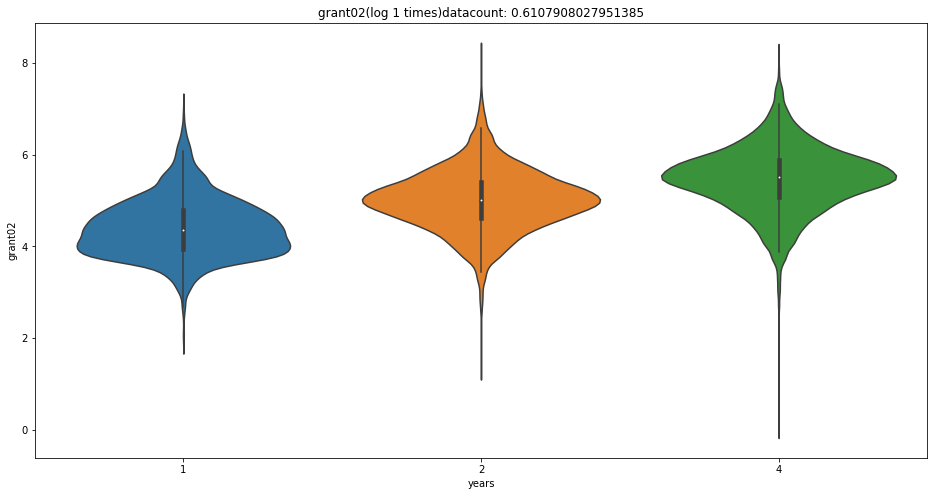

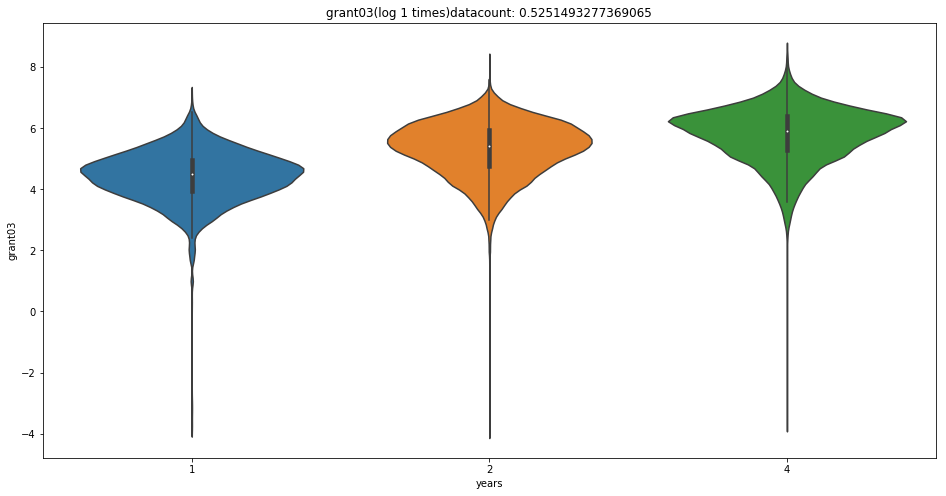

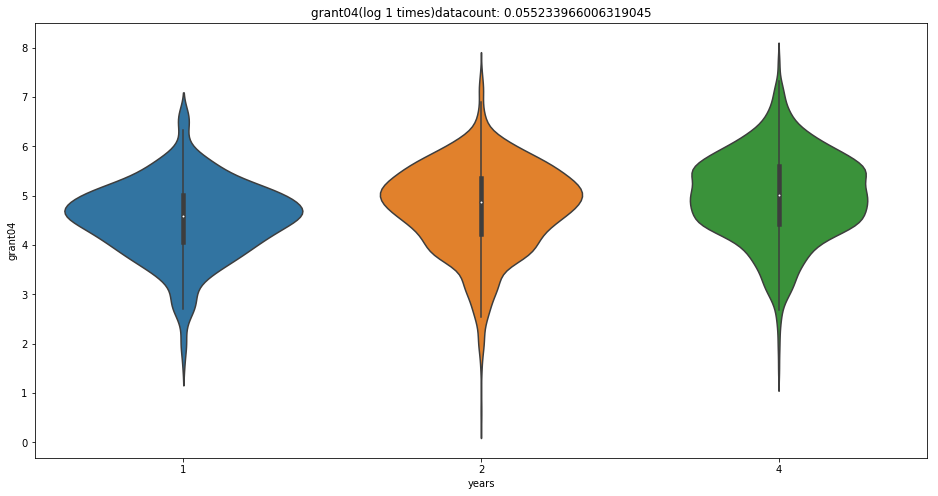

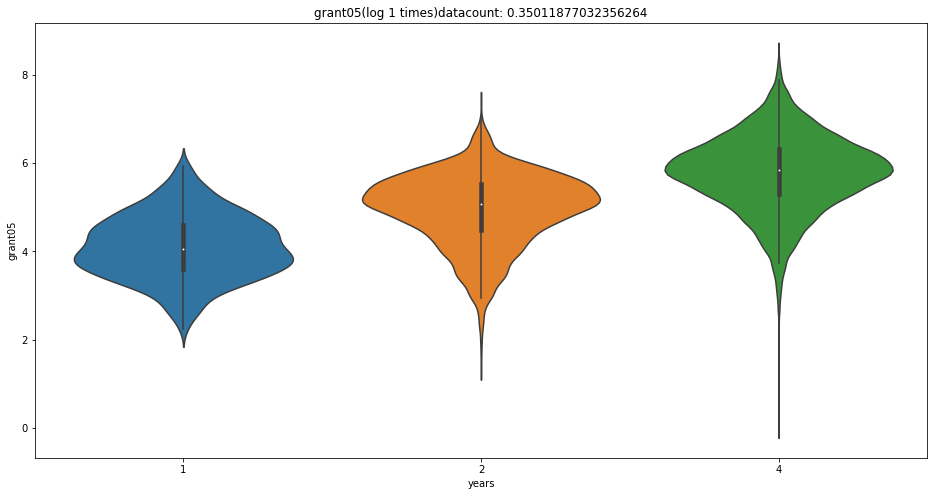

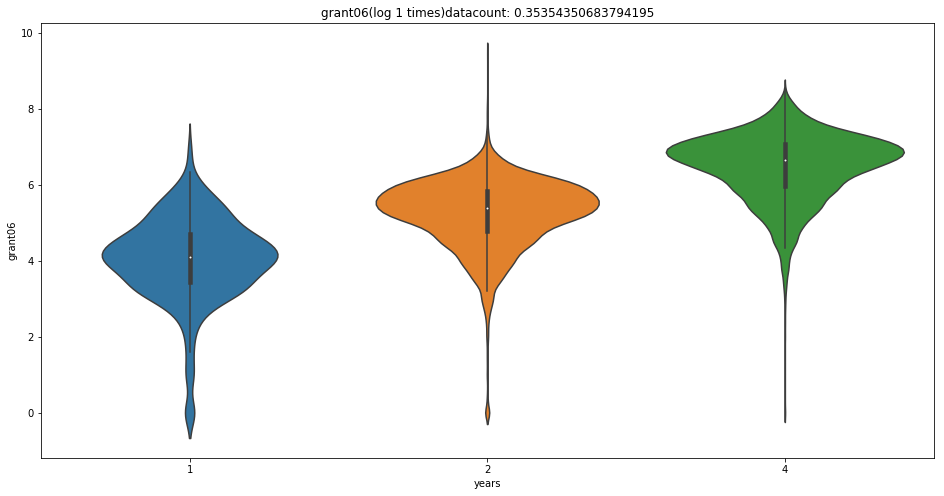

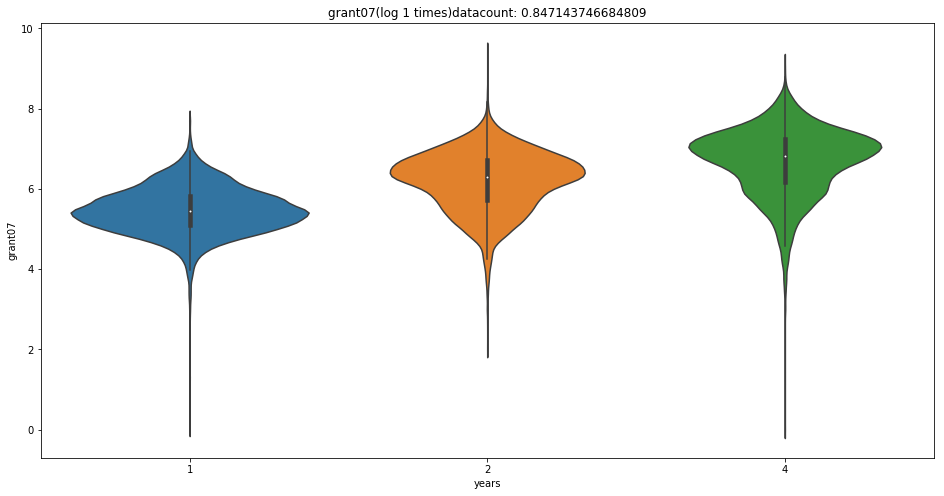

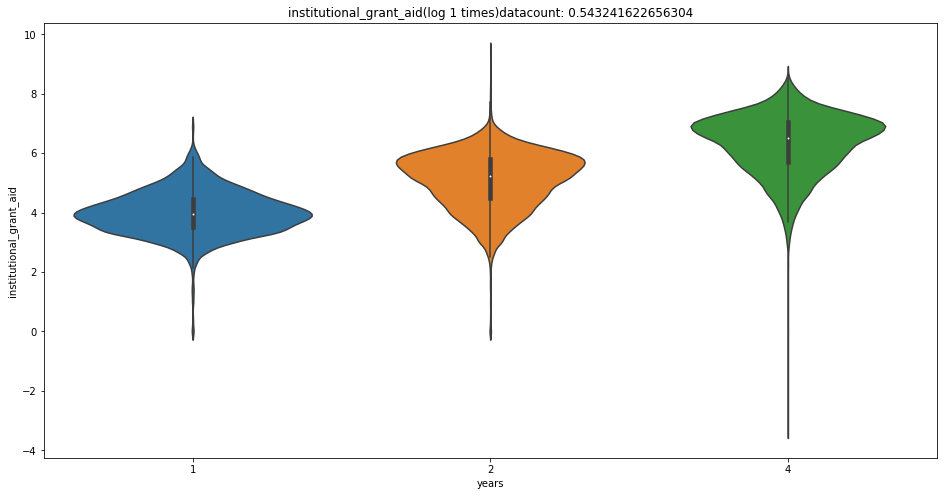

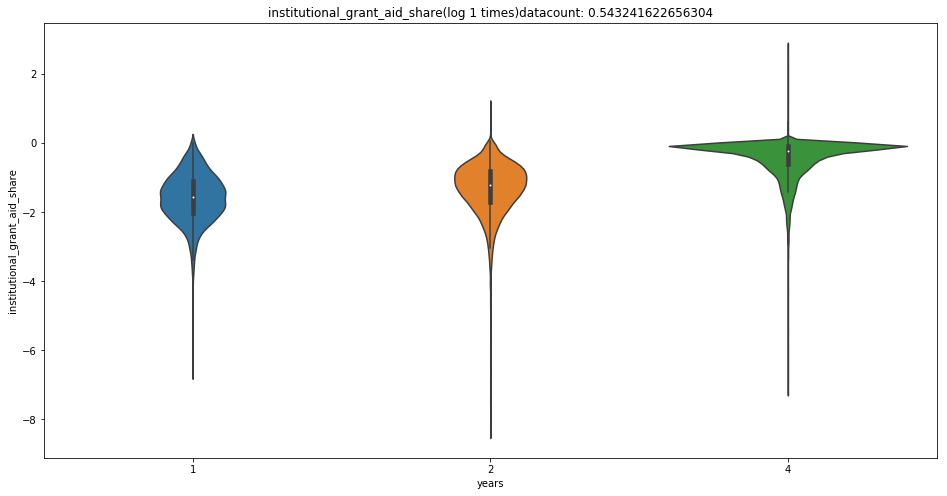

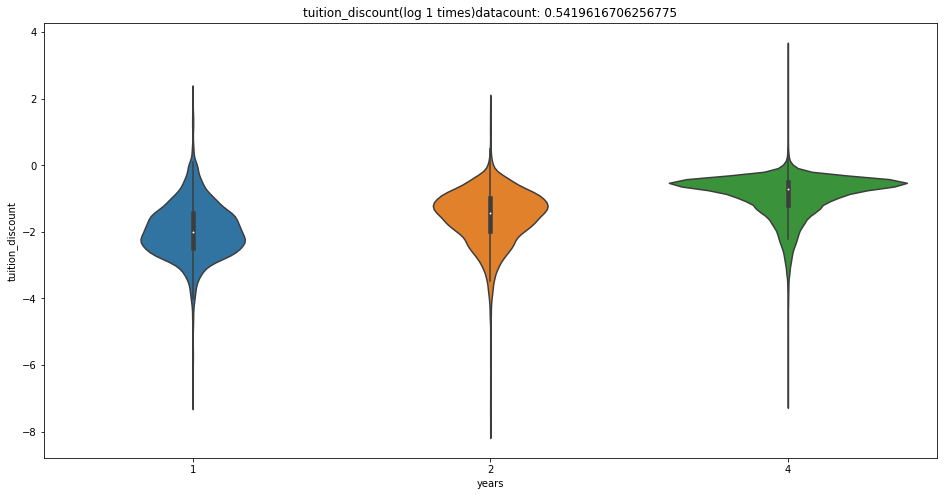

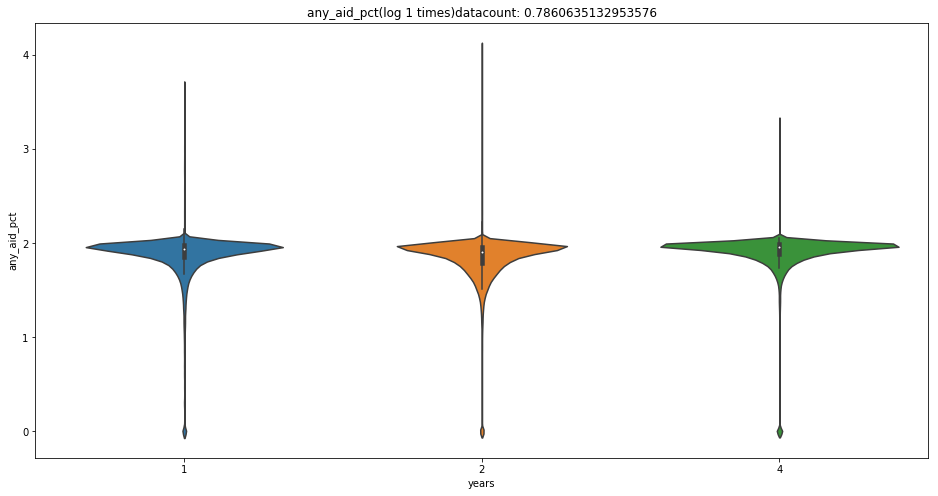

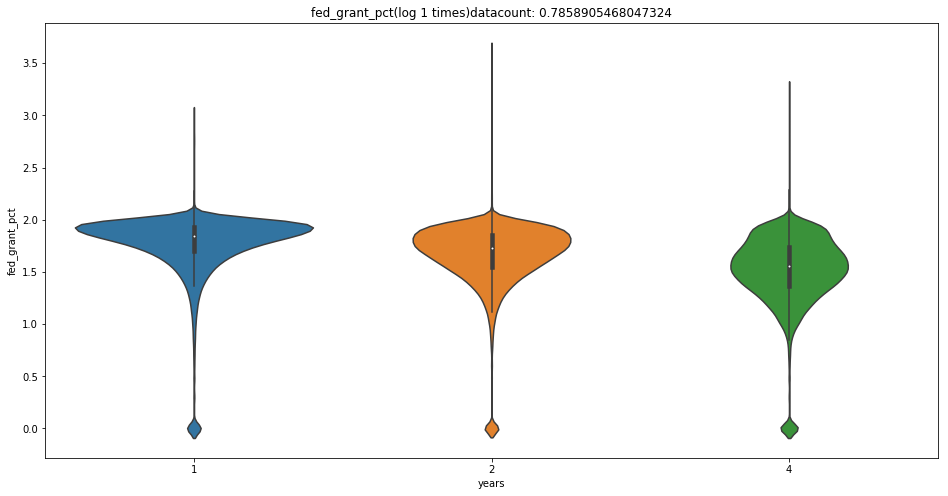

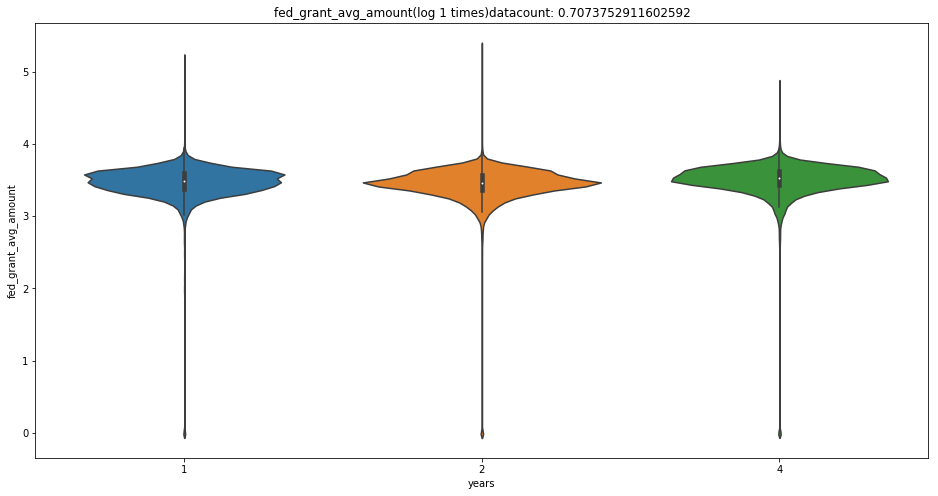

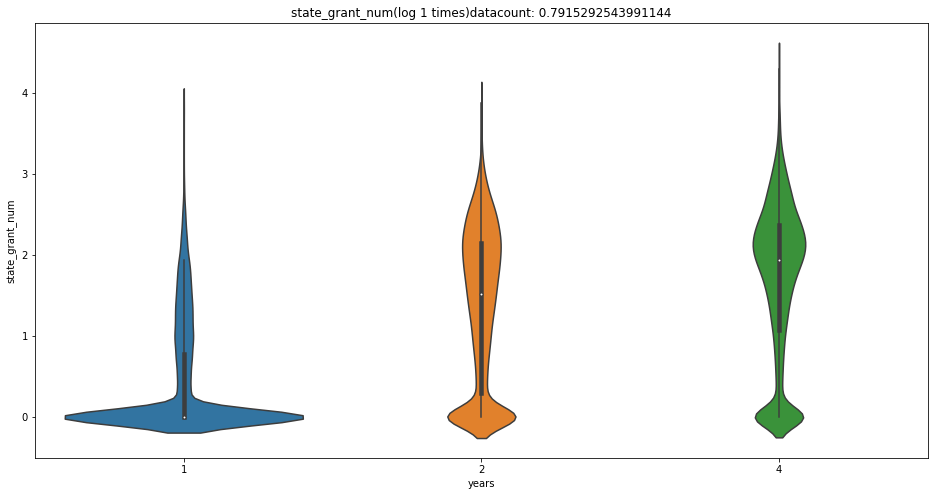

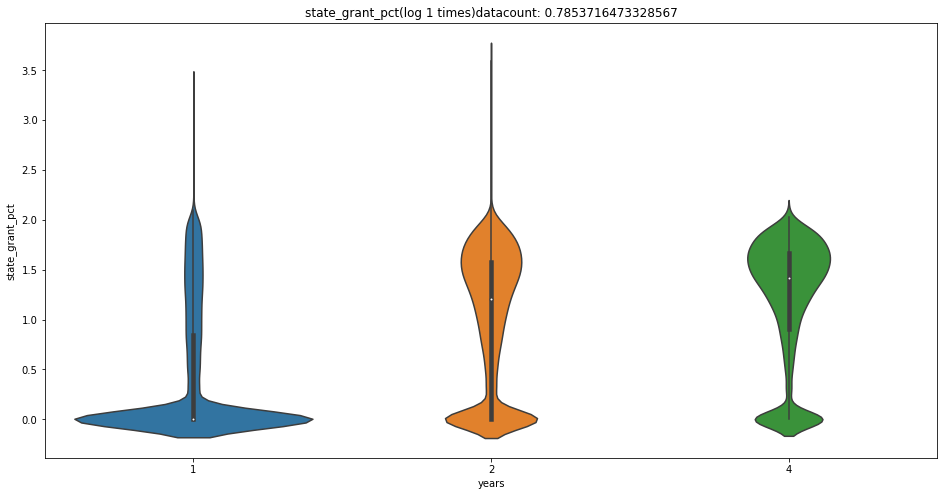

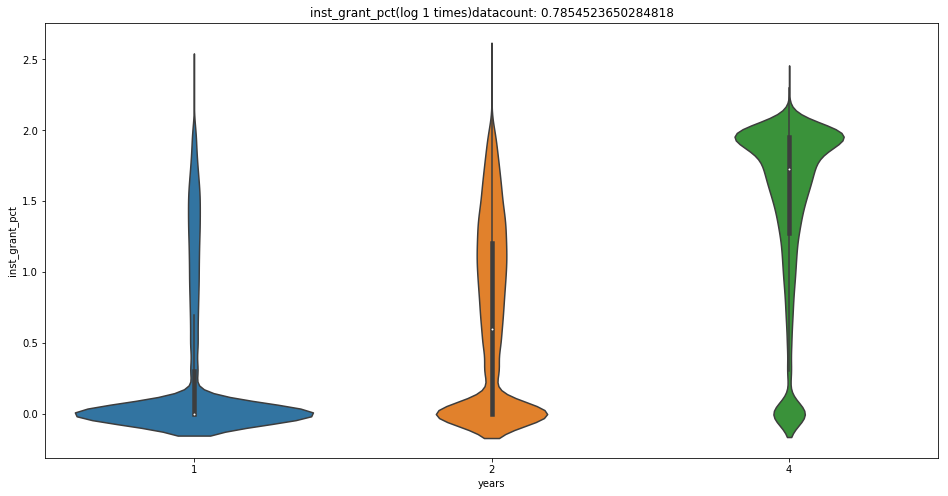

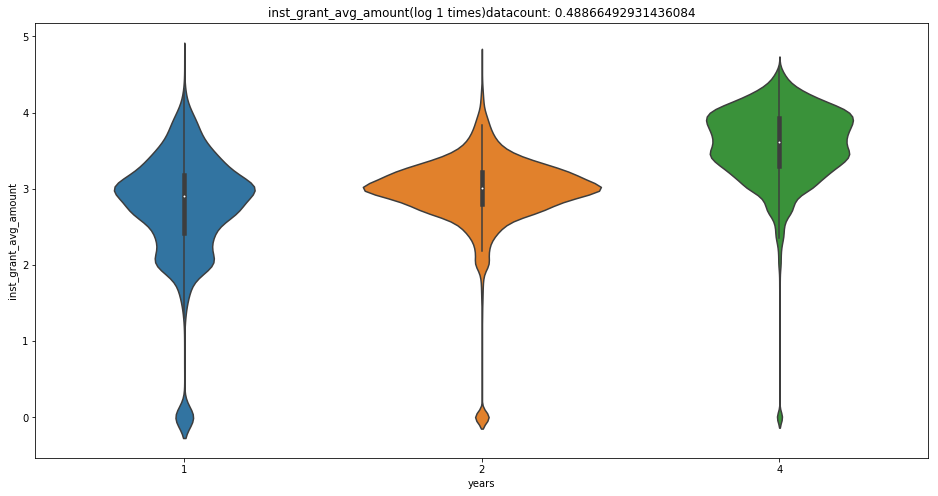

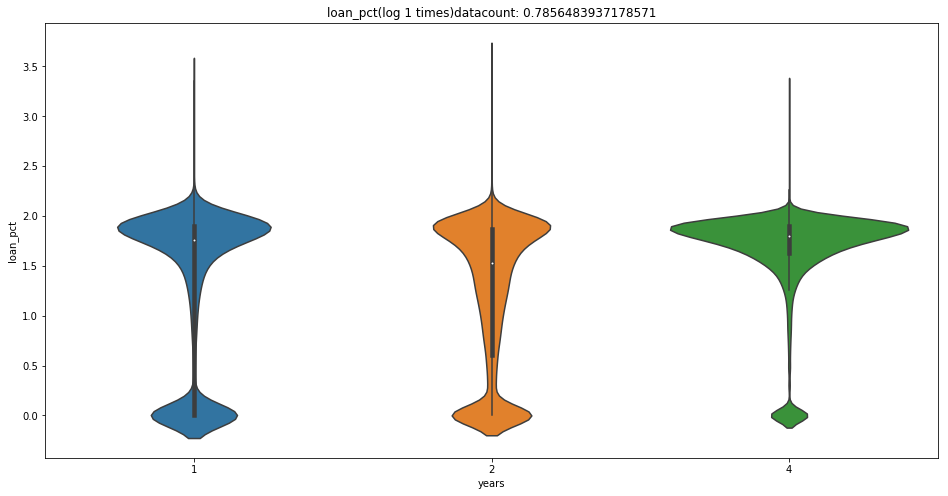

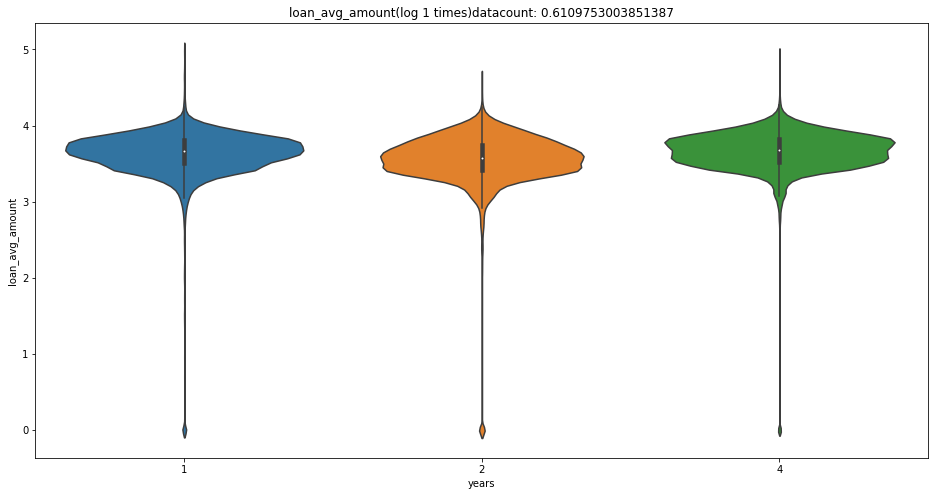

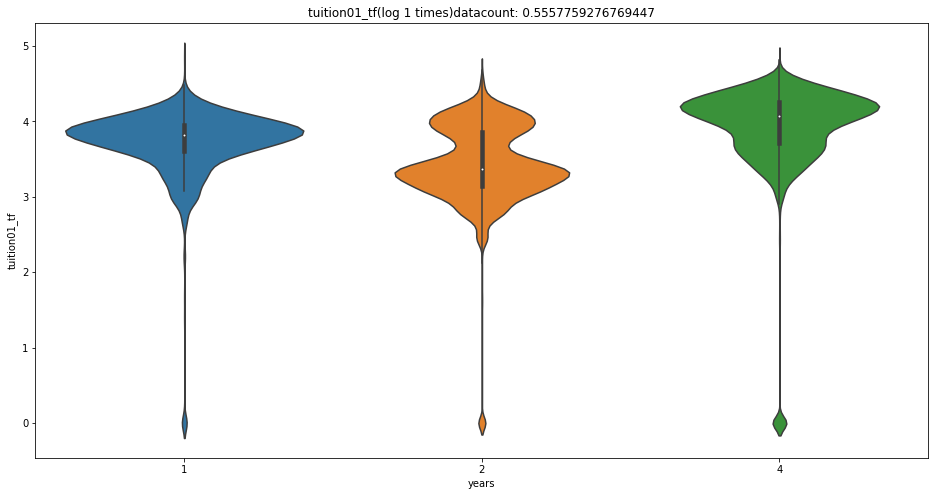

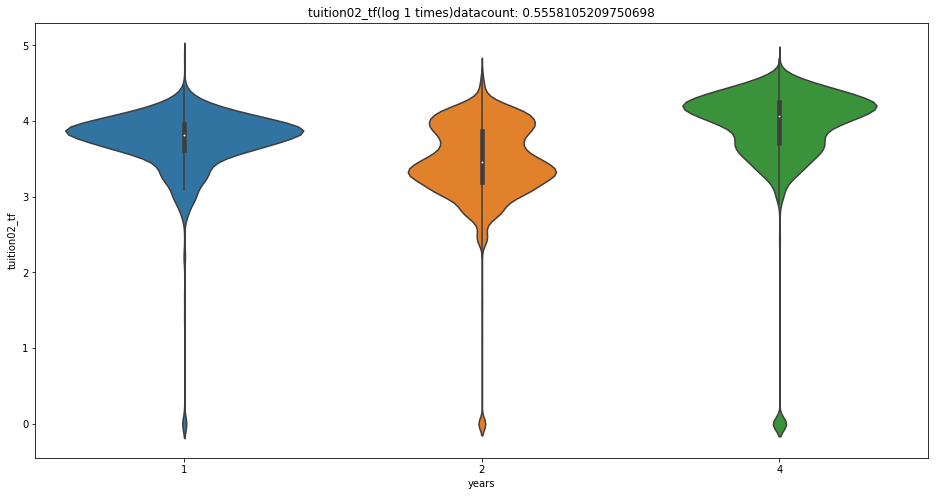

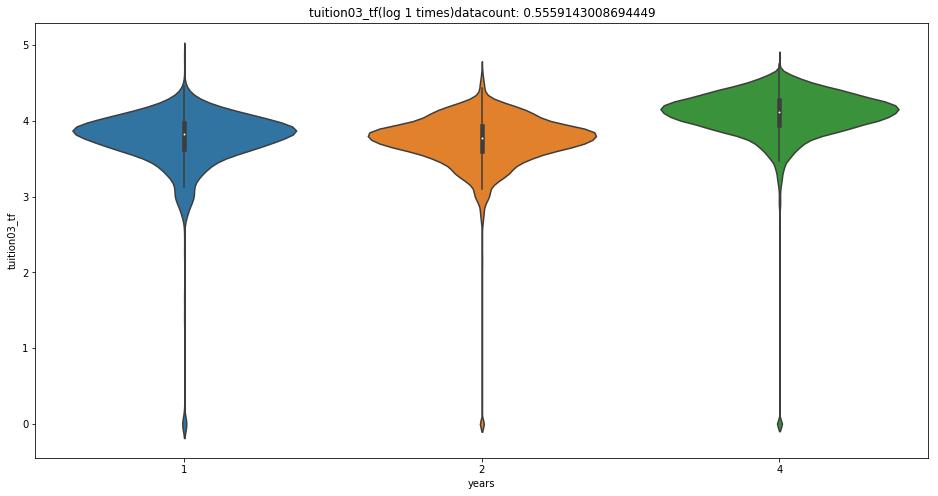

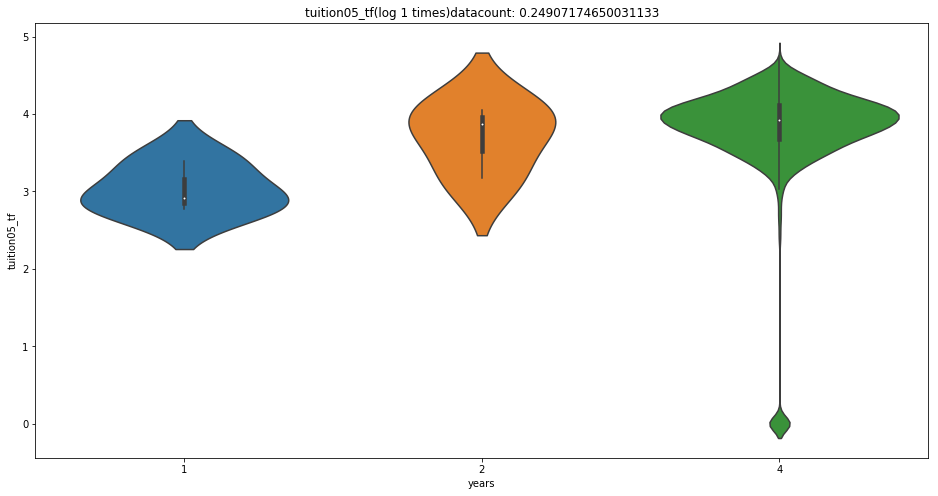

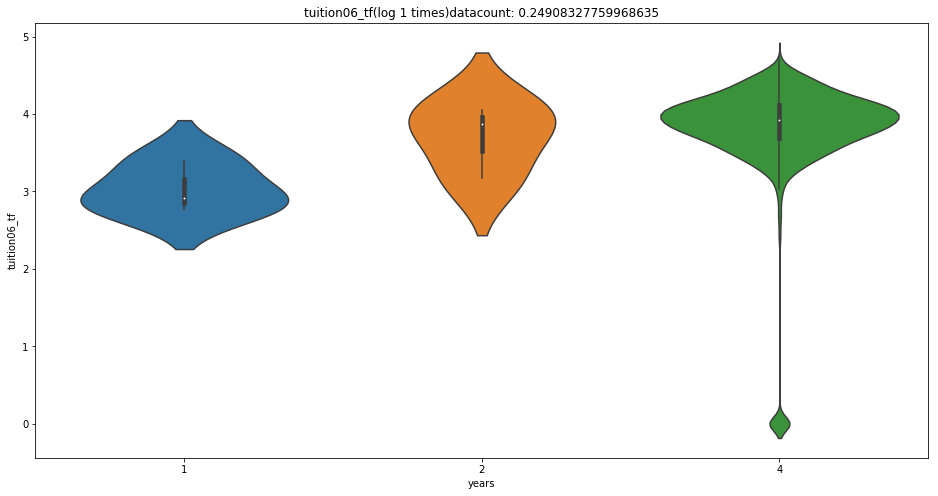

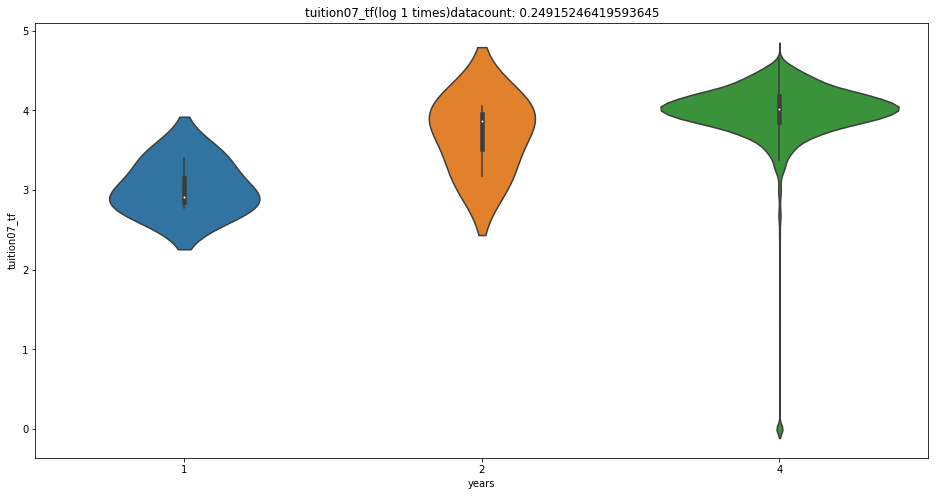

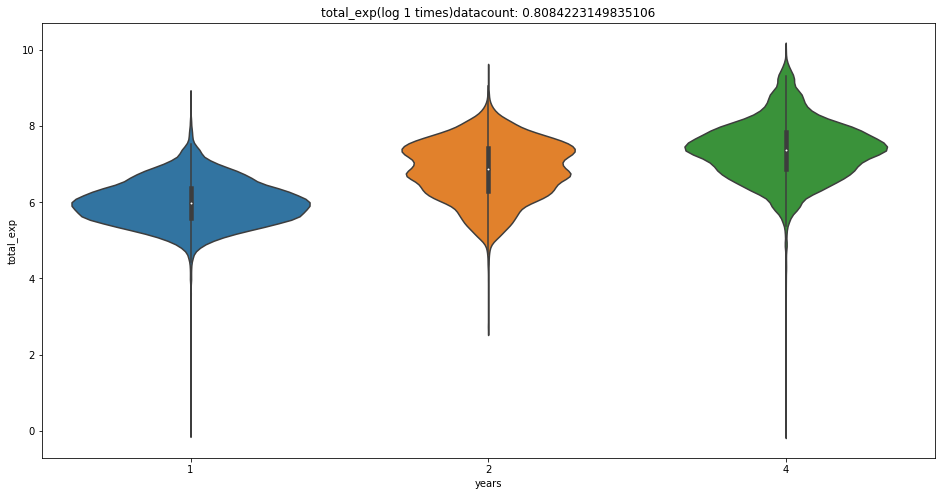

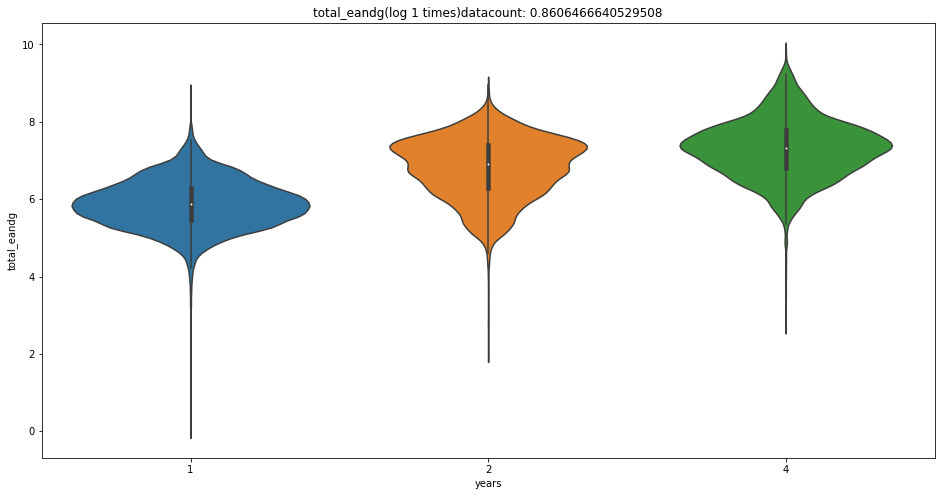

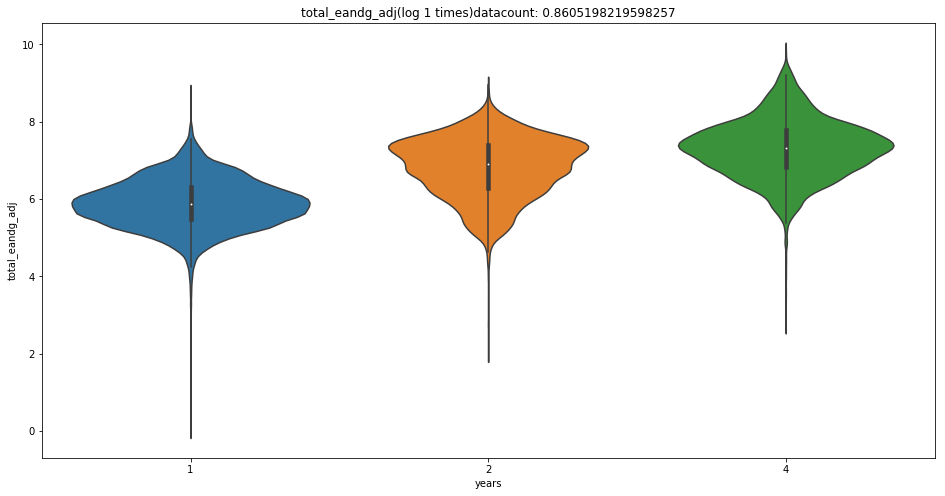

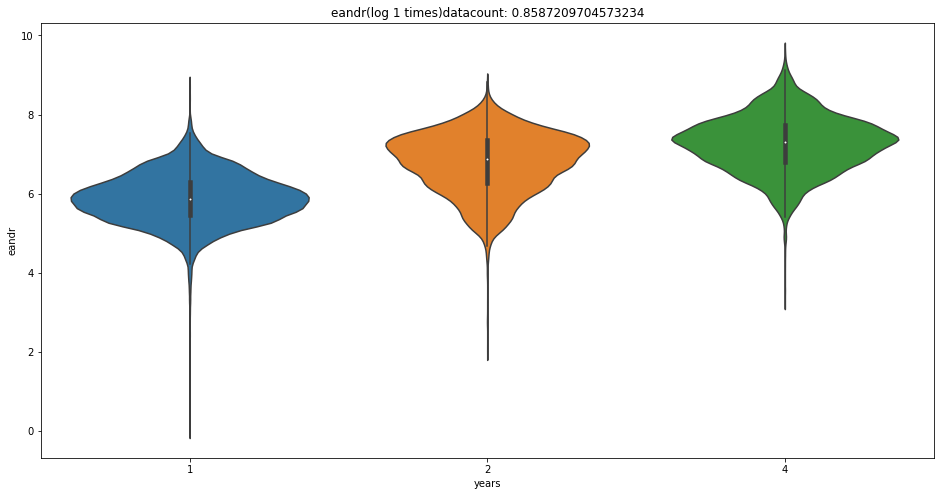

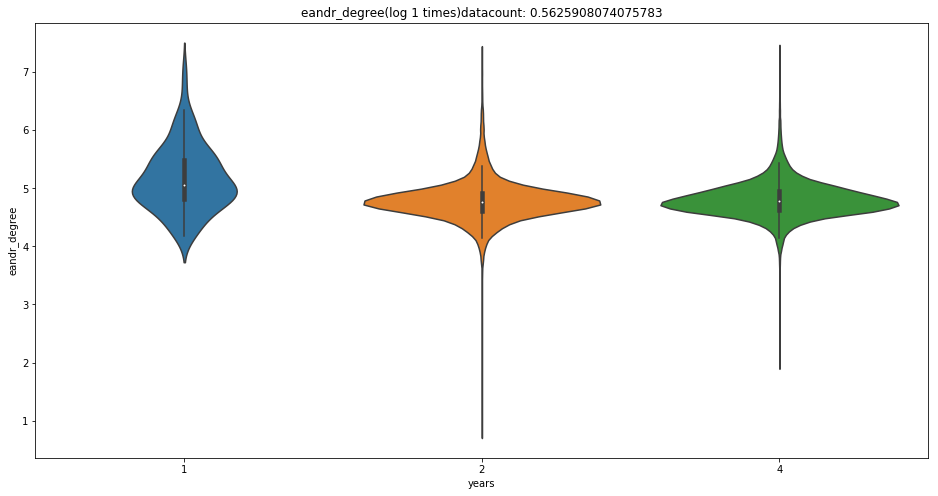

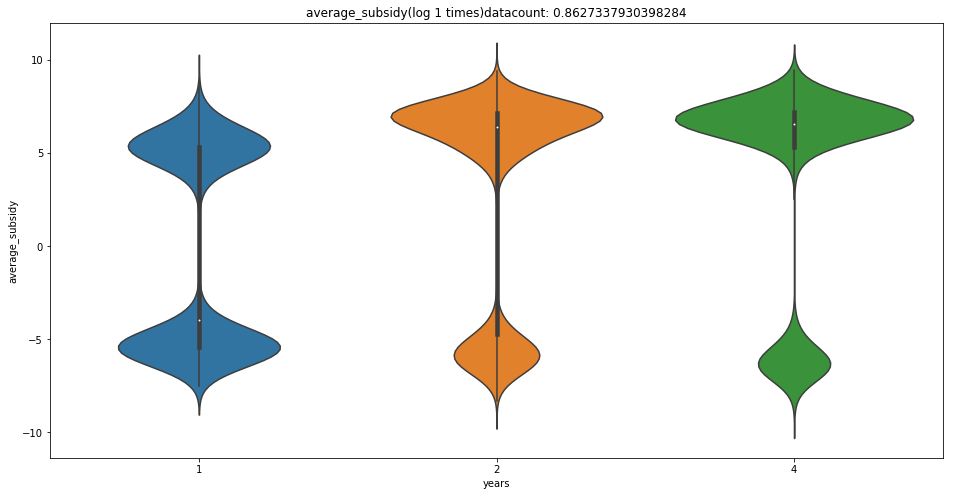

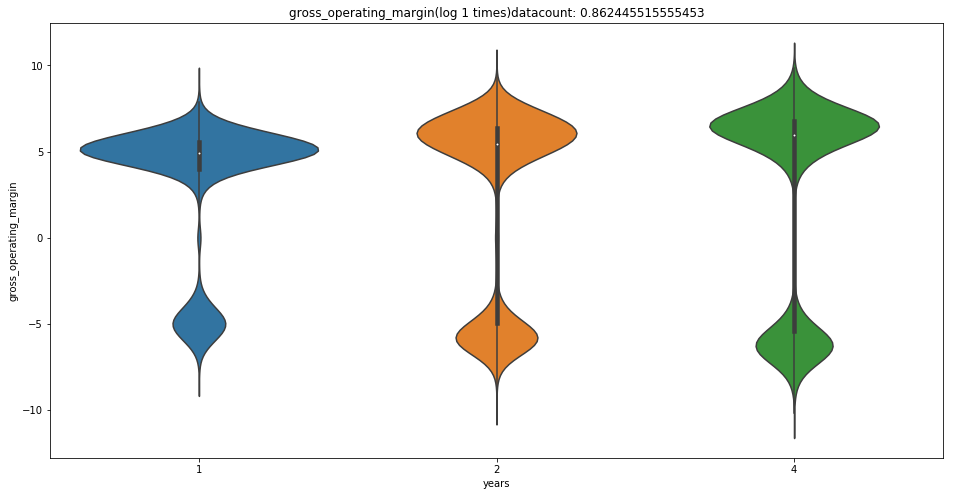

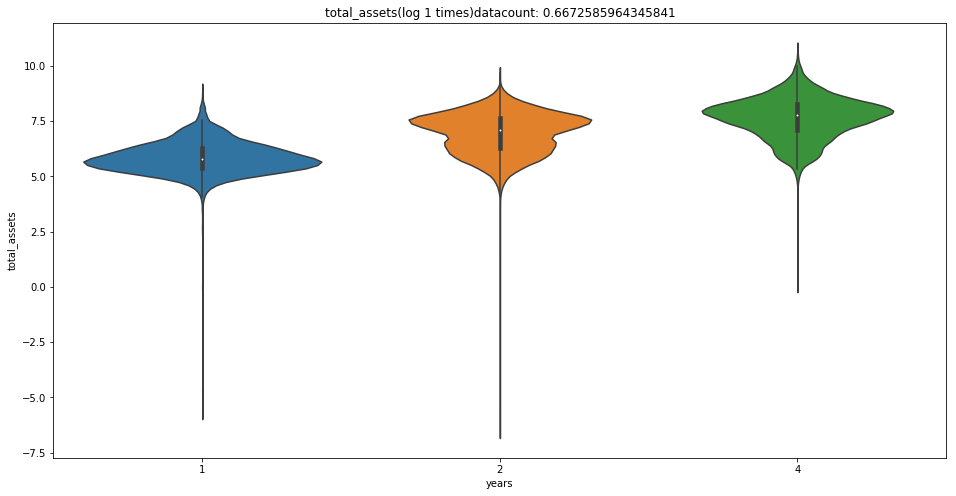

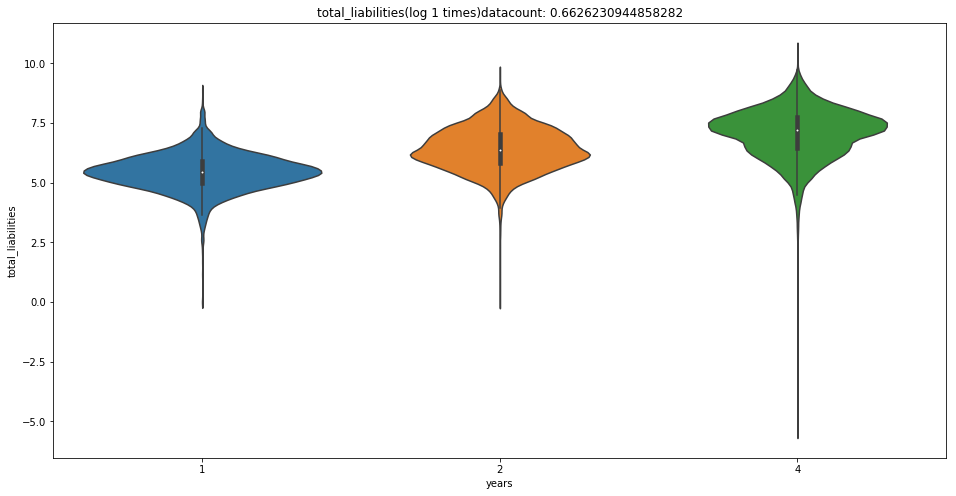

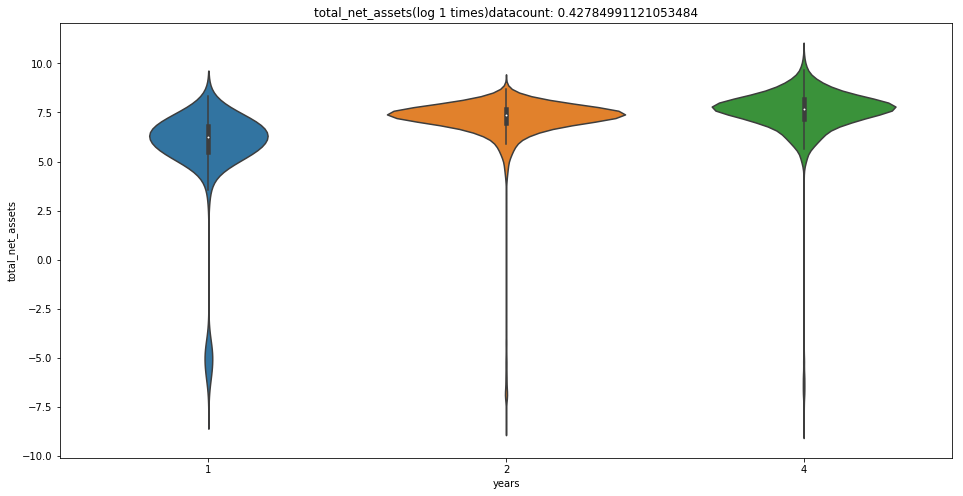

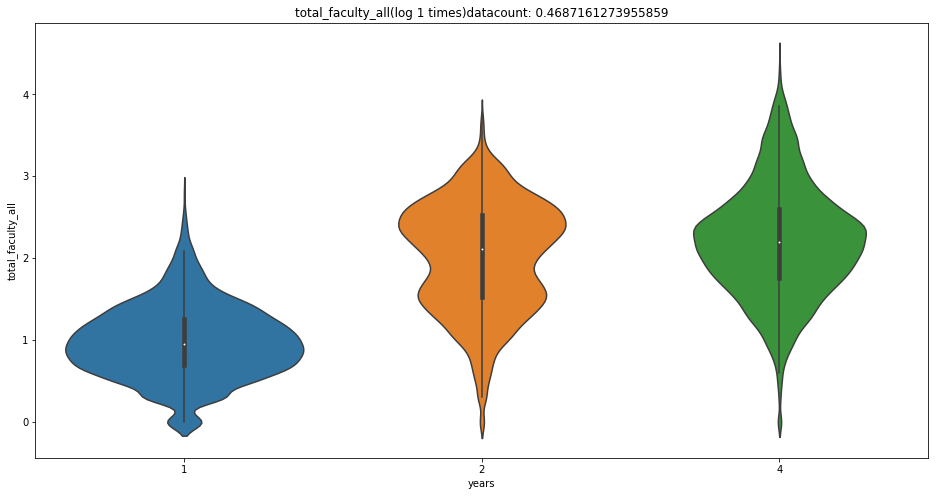

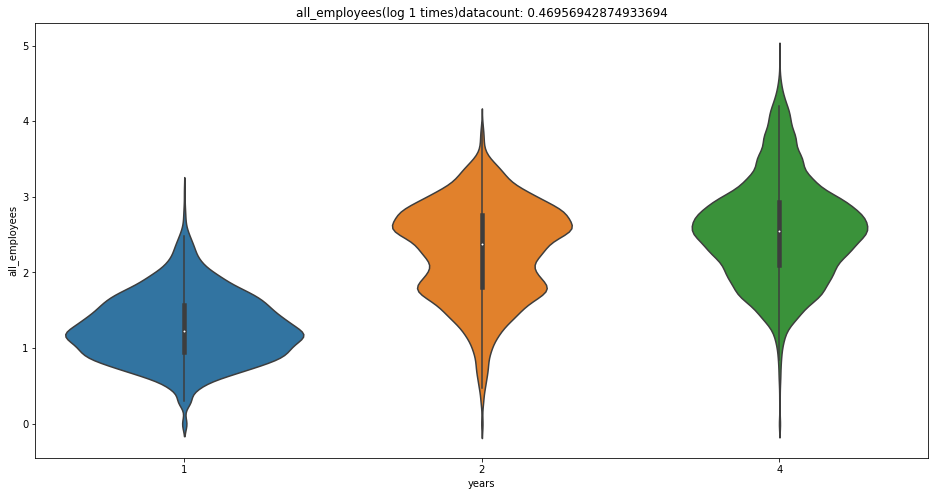

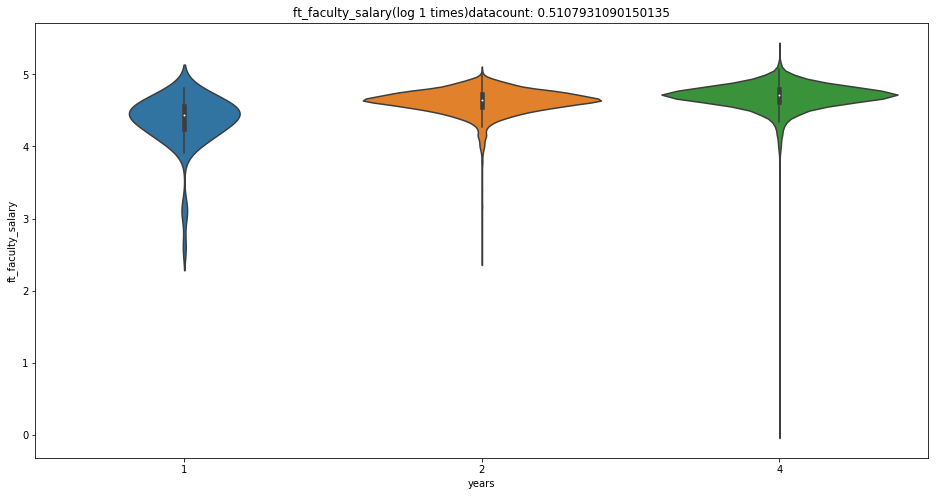

In [11]:
for c in college_financials.columns:
    df_temp = college_financials.copy()[college_financials[c].notnull()]
    need_log = False
    if df_temp[c].dtype in (object, np.int64):
        continue
    n = 0
    if (np.abs(df_temp[c].max() / df_temp[c].mean()) > 3):
        df_temp[c] = df_temp[c].apply(lambda x: np.sign(x) * np.log10(np.abs(x)) if not x == 0 else 0)
        n += 1
    plt.subplots(figsize=(16,8))
    sns.violinplot(x = "years", y = c, data = df_temp, dropna=True)
    plt.title(c + ('(log {} times)'.format(n) if n > 0 else '') + 'datacount: ' + str(len(df_temp)/len(college_financials)))
    plt.savefig('exploration/college_financials/' + c + '.pdf')

In [55]:
len(college_financials)

87560